In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import Levenshtein as lev
import itertools

In [2]:
# Loading in all variants
am_bottom_10 = pd.read_csv("../output/caitlin_experiment/am_bottom10_vars.csv", index_col = 0)
am_top_10 = pd.read_csv("../output/caitlin_experiment/am_top10_vars.csv", index_col = 0)
clinvar = pd.read_csv("../output/caitlin_experiment/clinvar_vars.csv", index_col = 0)
cosmic = pd.read_csv("../output/caitlin_experiment/cosmic_vars.csv", index_col = 0)
pt_vars = pd.read_csv("../output/caitlin_experiment/patient_vars.csv", index_col = 0)
gnomad = pd.read_csv("../output/caitlin_experiment/gnomad_vars.csv", index_col = 0)


In [3]:
concat_vars = pd.concat([am_bottom_10, am_top_10, clinvar, cosmic, pt_vars, gnomad])
all_muts = concat_vars[["Gene Name", "Mutant Sequence", "Protein Change"]].drop_duplicates()
all_muts

,Gene Name,Mutant Sequence,Protein Change
0,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro980Ala
1,NCOA1_AD3,VPSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Thr841Pro
2,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro975Ala
3,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Ile899Met
4,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Ser904Pro
...,...,...,...
1933,PAX5_AD,GRDFASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Phe
1934,PAX5_AD,GRDSASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Ser
1935,PAX5_AD,GPDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Pro
1937,PAX5_AD,GCDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Cys


In [4]:
all_muts["am_bottom_10"] = all_muts["Mutant Sequence"].isin(am_bottom_10["Mutant Sequence"]).astype(int)
all_muts["am_top_10"] = all_muts["Mutant Sequence"].isin(am_top_10["Mutant Sequence"]).astype(int)
all_muts["clinvar"] = all_muts["Mutant Sequence"].isin(clinvar["Mutant Sequence"]).astype(int)
all_muts["cosmic"] = all_muts["Mutant Sequence"].isin(cosmic["Mutant Sequence"]).astype(int)
all_muts["pt_vars"] = all_muts["Mutant Sequence"].isin(pt_vars["Mutant Sequence"]).astype(int)
all_muts["gnomad"] = all_muts["Mutant Sequence"].isin(gnomad["Mutant Sequence"]).astype(int)
all_muts

,Gene Name,Mutant Sequence,Protein Change,am_bottom_10,am_top_10,clinvar,cosmic,pt_vars,gnomad
0,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro980Ala,1,0,0,0,0,0
1,NCOA1_AD3,VPSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Thr841Pro,1,0,0,0,0,0
2,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro975Ala,1,0,0,0,0,0
3,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Ile899Met,1,0,0,1,0,0
4,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Ser904Pro,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1933,PAX5_AD,GRDFASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Phe,0,0,0,0,0,1
1934,PAX5_AD,GRDSASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Ser,0,0,0,0,0,1
1935,PAX5_AD,GPDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Pro,0,0,0,0,0,1
1937,PAX5_AD,GCDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Cys,0,0,0,0,0,1


In [5]:
all_muts["overlap_sum"] = all_muts["am_bottom_10"] + all_muts["am_top_10"] + all_muts["clinvar"] + all_muts["cosmic"] + all_muts["pt_vars"] + all_muts["gnomad"]
all_muts["pos"] = all_muts["Protein Change"].str.extract(r'(\d+)').astype(int)
all_muts.sort_values(by = "overlap_sum")

,Gene Name,Mutant Sequence,Protein Change,am_bottom_10,am_top_10,clinvar,cosmic,pt_vars,gnomad,overlap_sum,pos
0,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro980Ala,1,0,0,0,0,0,1,980
608,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Pro338Ser,0,0,0,0,0,1,1,338
612,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Leu341Pro,0,0,0,0,0,1,1,341
613,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Asp342His,0,0,0,0,0,1,1,342
614,OTX1_AD,AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,p.Asp342Asn,0,0,0,0,0,1,1,342
...,...,...,...,...,...,...,...,...,...,...,...
0,NKX2-2_AD,AQDLAAATFQAGIPFSAYSAQSLQYMQYNAQYSSASTPQYPTAHPL...,p.His244Tyr,0,0,1,1,1,1,4,244
1,NKX2-2_AD,AQDLAAATFQAGIPFSAYSVQSLQHMQYNAQYSSASTPQYPTAHPL...,p.Ala239Val,0,0,1,1,1,1,4,239
55,PAX5_AD,GRDLASTTLPGYPPHVPPTGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Ala322Thr,0,0,1,1,1,1,4,322
11,IKZF1_AD,GDKGLSDTPYDSSTSYEKENEMMKSHVMDQAINNAINYLGAESLRP...,p.Ala297Thr,0,0,1,1,1,1,4,297


In [6]:
coocurrences = all_muts[["am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
coocurrences

,am_bottom_10,am_top_10,clinvar,cosmic,pt_vars,gnomad
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1933,0,0,0,0,0,1
1934,0,0,0,0,0,1
1935,0,0,0,0,0,1
1937,0,0,0,0,0,1


In [7]:
co_occurrence_matrix = coocurrences.T.dot(coocurrences)
co_occurrence_matrix

,am_bottom_10,am_top_10,clinvar,cosmic,pt_vars,gnomad
am_bottom_10,146,0,1,13,20,37
am_top_10,0,113,0,9,4,19
clinvar,1,0,65,10,27,44
cosmic,13,9,10,646,88,230
pt_vars,20,4,27,88,555,394
gnomad,37,19,44,230,394,1939


In [8]:
mask = np.triu(np.ones_like(co_occurrence_matrix, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

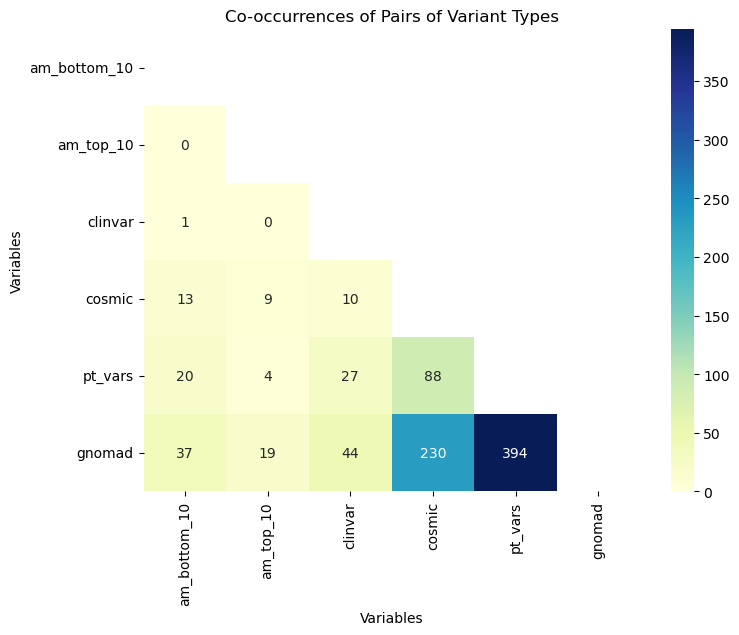

In [9]:
#df = pd.DataFrame(data)

# Calculate co-occurrences

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, mask = mask, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Co-occurrences of Pairs of Variant Types')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

Visualize per AD

In [14]:
cc_names = pd.read_excel("../data/gene_names_with_location_and_pmvs.xlsx")
cc_names = cc_names.rename(columns = {"gene" : "Gene", "start" : "Start", "end" : "End"})
known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
cc_names = pd.merge(known_ADs[["uniprotID", "Gene", "Start", "End"]], cc_names)
ensts = pd.read_csv("../data/SFARI_TFs_with_ENST_corrected.csv", index_col = 0)
cc_names = pd.merge(cc_names, ensts)
cc_names["ENST"] = cc_names["ENST"].str.split(".").str[0]
cc_names["len"] = cc_names["End"] - cc_names["Start"] + 1
cc_names = cc_names.rename(columns = {"Start" : "start", "End" : "end"})
cc_names

,uniprotID,Gene,start,end,pMVS #,Gene Name,ENST,len
0,O94983,CAMTA2,285,468,404,CAMTA2_AD1,ENST00000348066,184
1,O94983,CAMTA2,472,581,405,CAMTA2_AD2,ENST00000348066,110
2,P11308,ERG,433,479,400,ERG_AD1,ENST00000288319,47
3,P11308,ERG,118,261,406,ERG_AD2,ENST00000288319,144
4,Q13422,IKZF1,284,365,402,IKZF1_AD,ENST00000331340,82
5,O14770,MEIS2,340,477,377,MEIS2_AD,ENST00000561208,138
6,Q15788,NCOA1,1241,1385,379,NCOA1_AD2,ENST00000348332,145
7,Q15788,NCOA1,840,1011,380,NCOA1_AD3,ENST00000348332,172
8,O95096,NKX2-2,220,273,381,NKX2-2_AD,ENST00000377142,54
9,P43354,NR4A2,1,91,382,NR4A2_AD1,ENST00000339562,91


In [11]:
ADs = set(all_muts["Gene Name"])
ADs

{'CAMTA2_AD1',
 'CAMTA2_AD2',
 'ERG_AD1',
 'ERG_AD2',
 'IKZF1_AD',
 'MEIS2_AD',
 'NCOA1_AD2',
 'NCOA1_AD3',
 'NKX2-2_AD',
 'NR4A2_AD1',
 'NR4A2_AD2',
 'OTX1_AD',
 'PAX5_AD',
 'PAX6_AD',
 'PITX1_AD'}

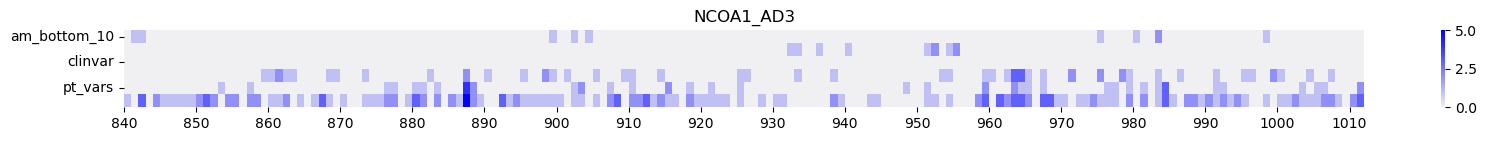

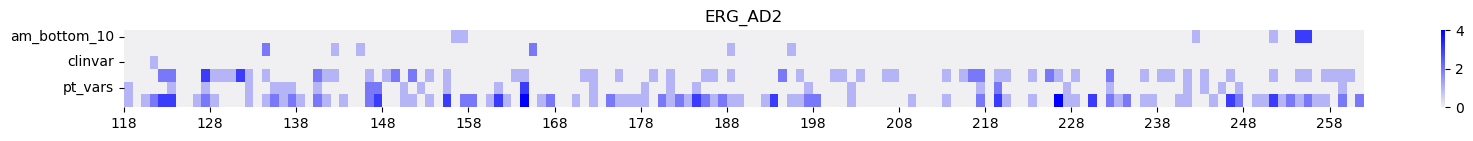

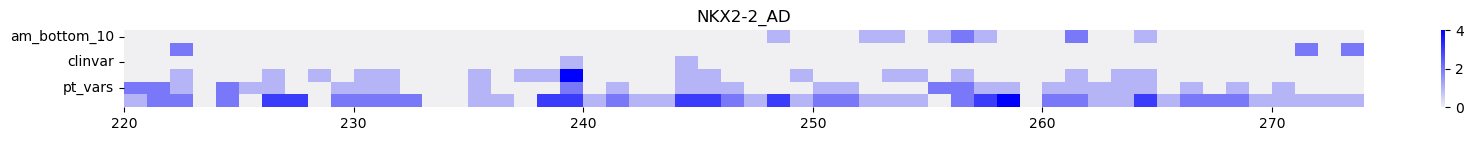

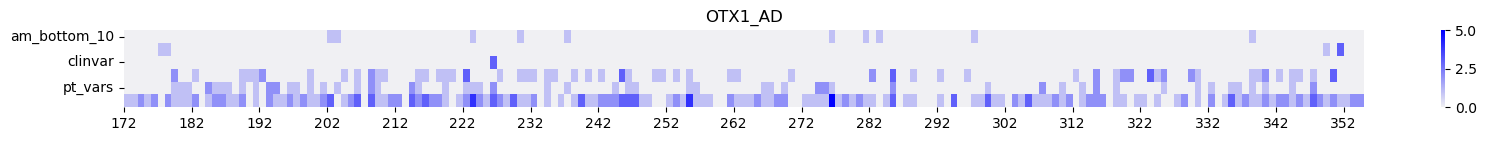

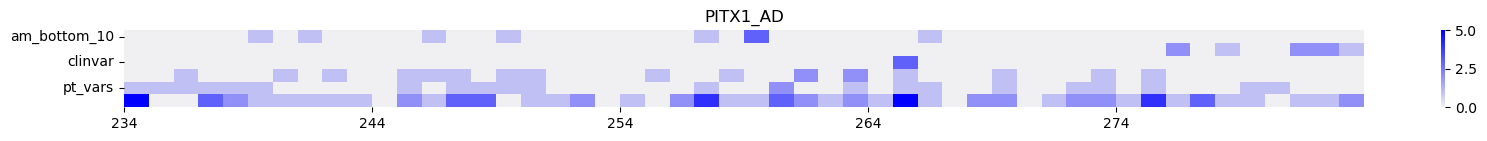

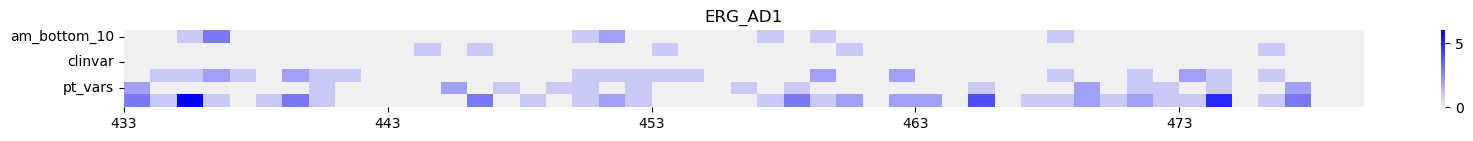

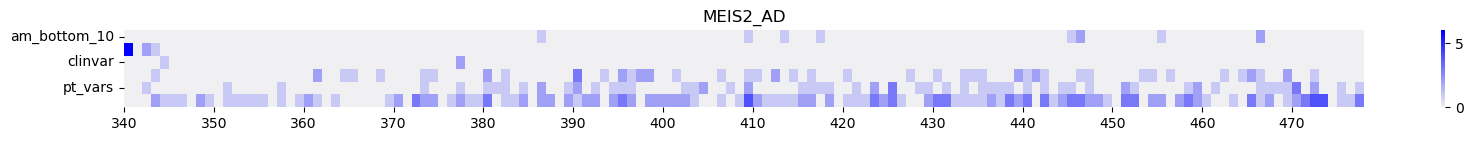

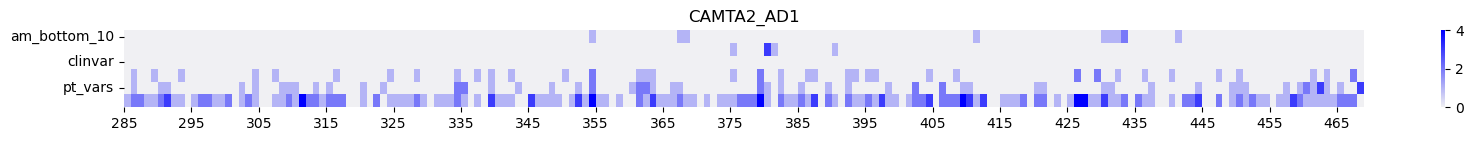

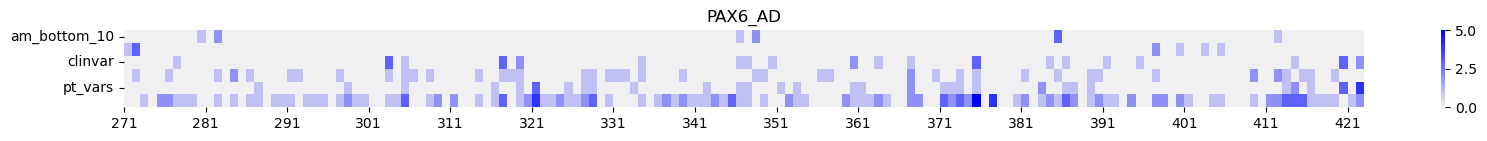

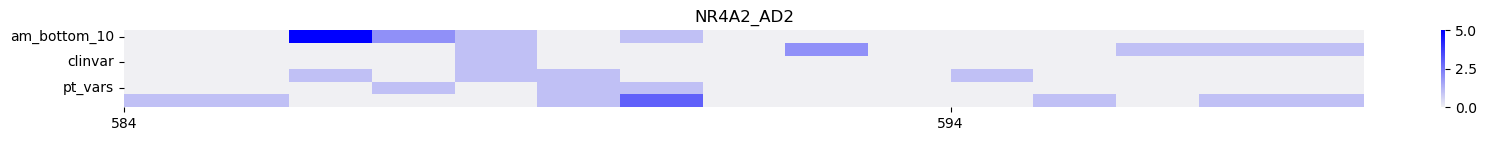

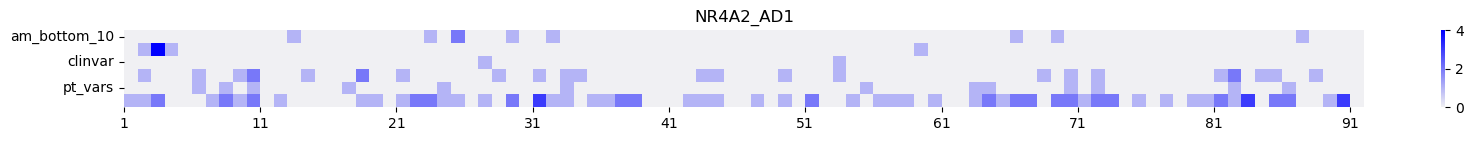

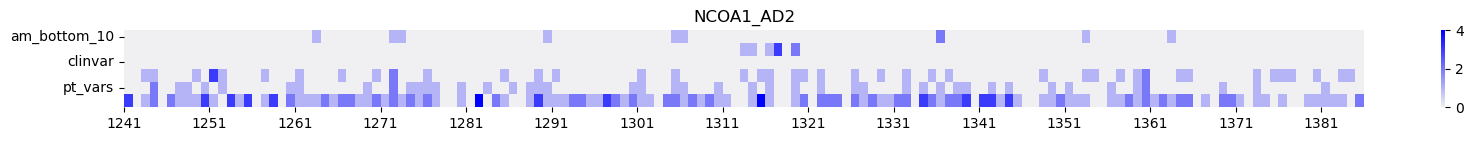

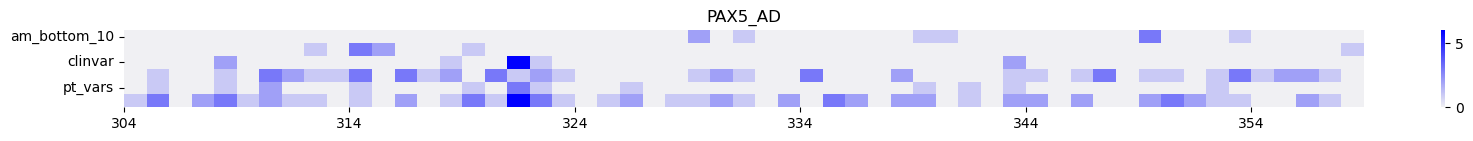

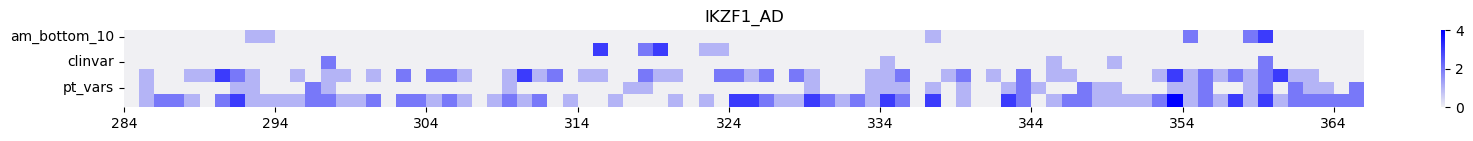

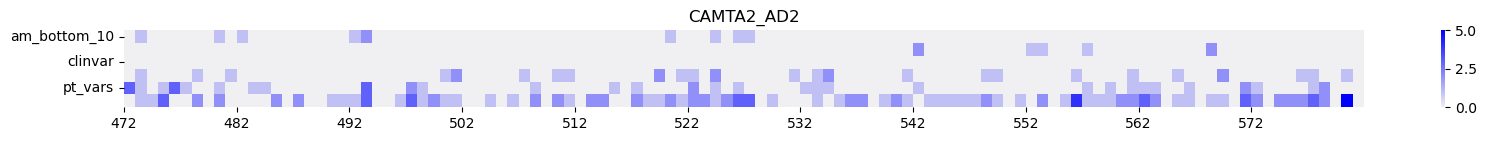

In [15]:
for AD in ADs:
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by = "pos")
    
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["start"].iloc[0]
    end = cc_row["end"].iloc[0]
    empty_added = pd.DataFrame({"pos" : np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how = "left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    
    plt.figure(figsize = (20,1))
    sns.heatmap(pivot.T, cmap = sns.color_palette("light:b", as_cmap=True))
    plt.xticks(ticks=range(0, len(pivot.index), 10), labels=pivot.index[::10], rotation=0, ha='center')
    plt.xlabel("")
    plt.title(AD);

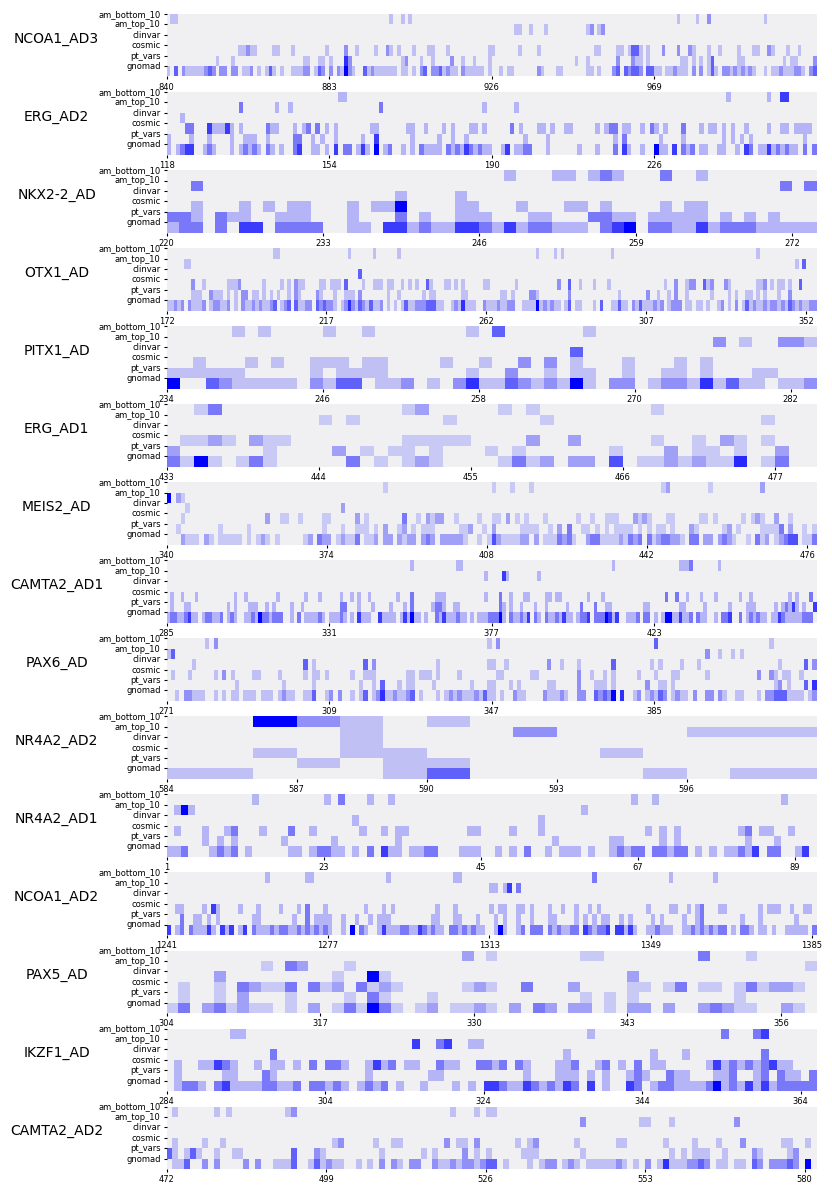

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sample ADs list for demonstration
#ADs = ["AD1", "AD2", "AD3", "AD4", "AD5", "AD6", "AD7", "AD8", "AD9", "AD10", "AD11", "AD12", "AD13", "AD14", "AD15"]

# Assuming you have all_muts and cc_names dataframes loaded
fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(10, 15))  # Smaller figure size
plt.subplots_adjust(left=0.25, hspace=0.25)  # Adjust layout for more space on the left and between plots

for i, AD in enumerate(ADs):
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["start"].iloc[0]
    end = cc_row["end"].iloc[0]
    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    
    ax = axes[i]  # Select the current axis
    sns.heatmap(pivot.T, cmap=sns.color_palette("light:b", as_cmap=True), ax=ax, cbar=False)

    tick_interval = len(pivot.index) // 4
    ax.set_xticks(range(0, len(pivot.index), tick_interval))
    ax.set_xticklabels(pivot.index[::tick_interval], rotation=0, ha='center', fontsize=6)  # Smaller x-tick font size
    ax.tick_params(axis='both', which='major', pad=2.3, length = 2)
    #ax.tick_params(left=True, bottom=False5

    ax.set_yticks(range(len(pivot.columns)))  # Adjust y-axis ticks
    ax.set_yticklabels(pivot.columns, fontsize=6)  # Set y-axis font size smaller
    
    ax.set_xlabel("")
    ax.set_ylabel(AD, rotation = 0, labelpad = 30)
    #ax.set_title(AD, loc='right', fontsize=8)  # Set title on the left, further out with pad

# Show the full plot with all subplots
plt.show()


---
### Try 2: Attempting with scatter

In [17]:
cc_names["len"] = cc_names["end"] - cc_names["start"] + 1
cc_names = cc_names.sort_values(by = "len")
cc_names

,uniprotID,Gene,start,end,pMVS #,Gene Name,ENST,len
10,P43354,NR4A2,584,598,383,NR4A2_AD2,ENST00000339562,15
2,P11308,ERG,433,479,400,ERG_AD1,ENST00000288319,47
14,P78337,PITX1,234,283,409,PITX1_AD,ENST00000265340,50
8,O95096,NKX2-2,220,273,381,NKX2-2_AD,ENST00000377142,54
12,Q02548,PAX5,304,358,410,PAX5_AD,ENST00000358127,55
4,Q13422,IKZF1,284,365,402,IKZF1_AD,ENST00000331340,82
9,P43354,NR4A2,1,91,382,NR4A2_AD1,ENST00000339562,91
1,O94983,CAMTA2,472,581,405,CAMTA2_AD2,ENST00000348066,110
5,O14770,MEIS2,340,477,377,MEIS2_AD,ENST00000561208,138
3,P11308,ERG,118,261,406,ERG_AD2,ENST00000288319,144


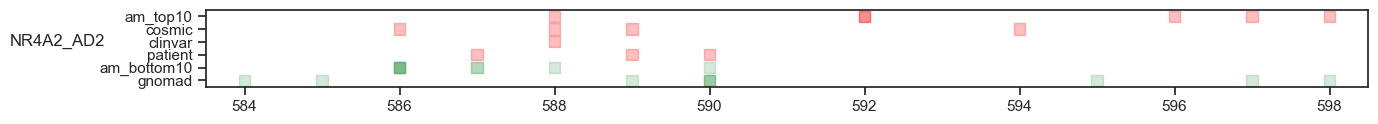

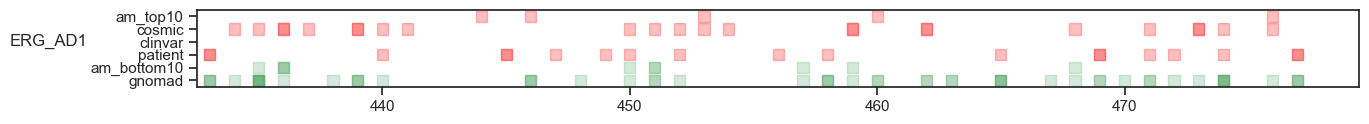

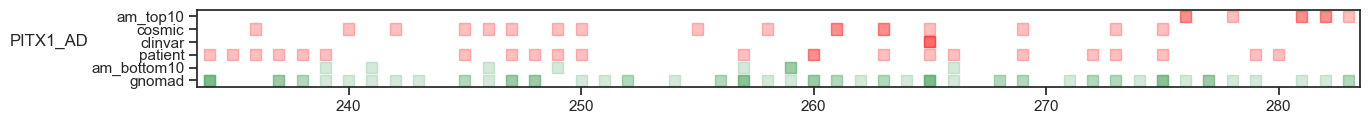

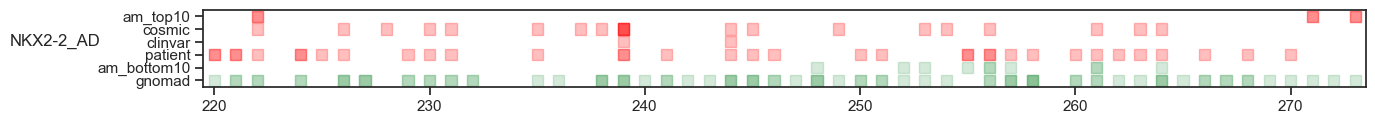

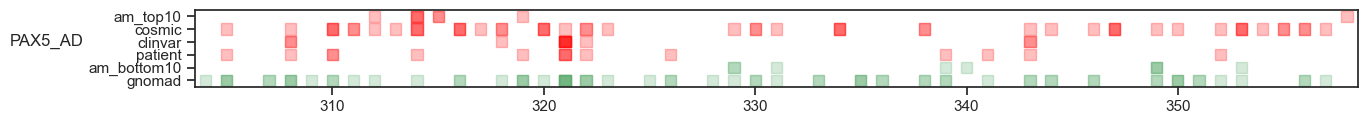

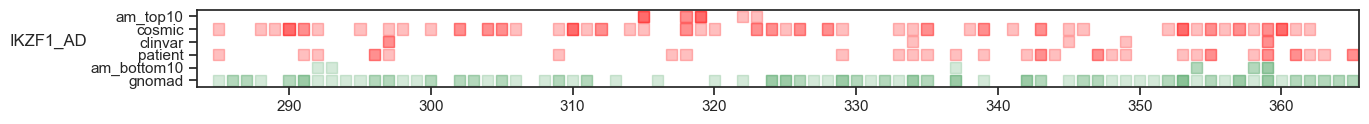

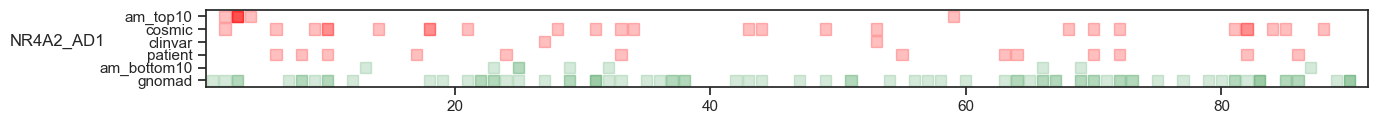

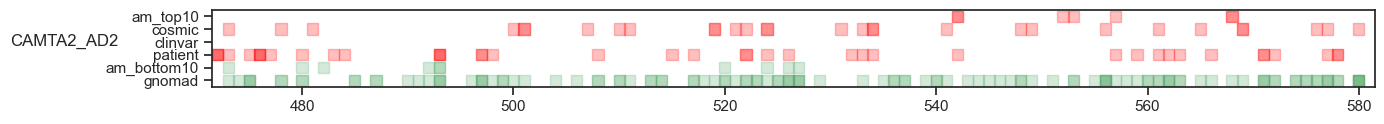

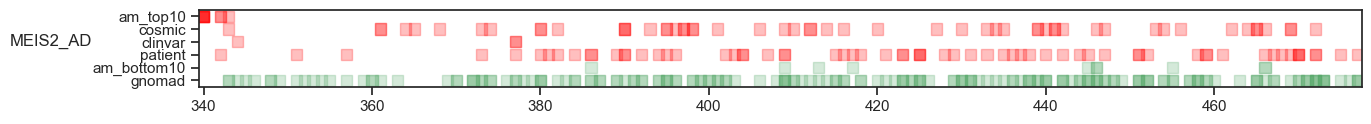

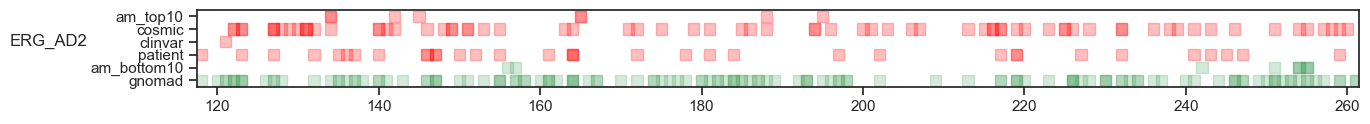

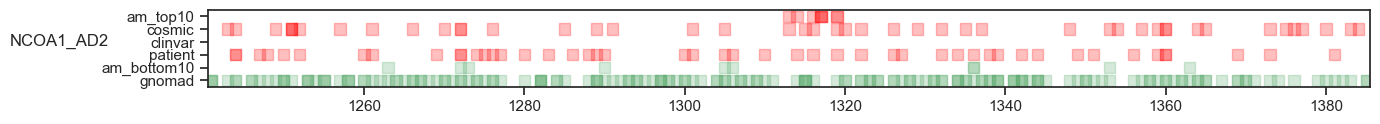

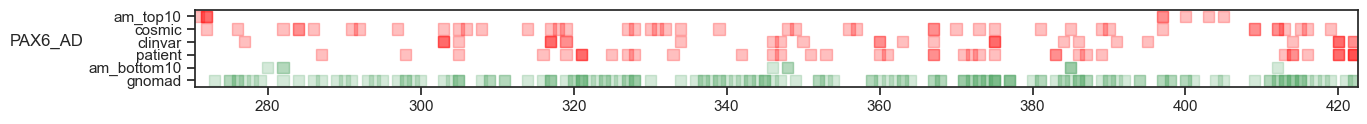

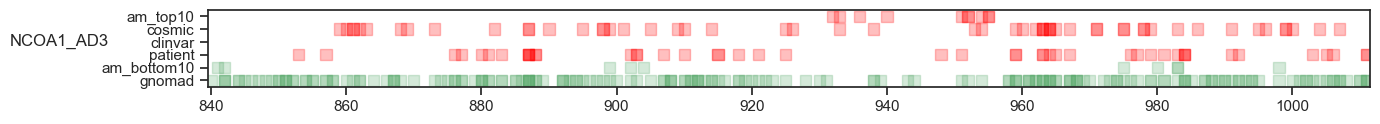

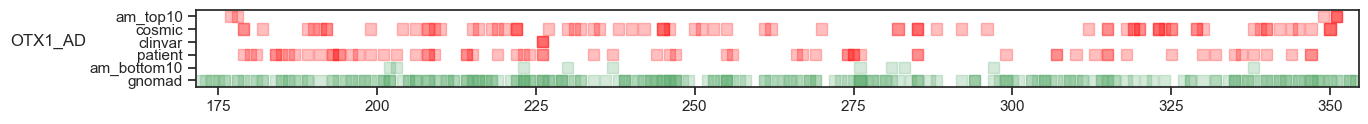

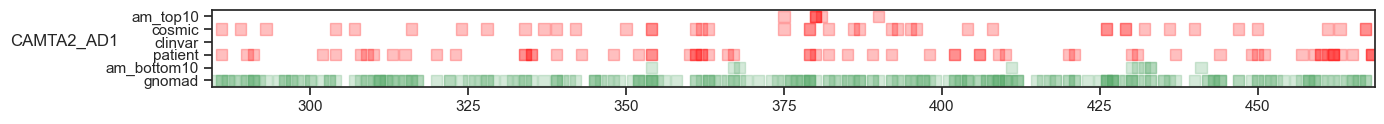

In [18]:
y_axis_mappings = {"gnomad" : 1, "am_bottom10":2,  "patient" : 3, "clinvar":4, "cosmic":5, "am_top10":6}
color_mappings = {"gnomad" : "g", "am_bottom10":"g",  "patient" : "red", "clinvar":"red", "cosmic":"red", "am_top10":"red"}

concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

for AD in cc_names["Gene Name"]:
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["start"].iloc[0]
    end = cc_row["end"].iloc[0]
    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
        
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]
    
    sns.set(style="ticks")
    plt.figure(figsize=(15, 1))
    plt.xlim(start-0.5, end + 0.5)
    plt.ylim(0.5, 6.5)
    
    ax = plt.scatter(x = "pos", y = "y_val", color = "hue", data = AD_concat_vars, alpha = 0.25, marker= "$\u25A0$", s = 65)
    plt.gca().set_yticks(range(1, 7))  # Set y-ticks to match y_val range
    plt.gca().set_yticklabels(y_axis_mappings.keys())  # Assuming y_axis_mappings is defined
    
    # Set title and labels
    plt.ylabel(AD, rotation = 0, labelpad = 30)
    #plt.xlabel("Position")
    #plt.ylabel("Y Value")
    
    plt.show()

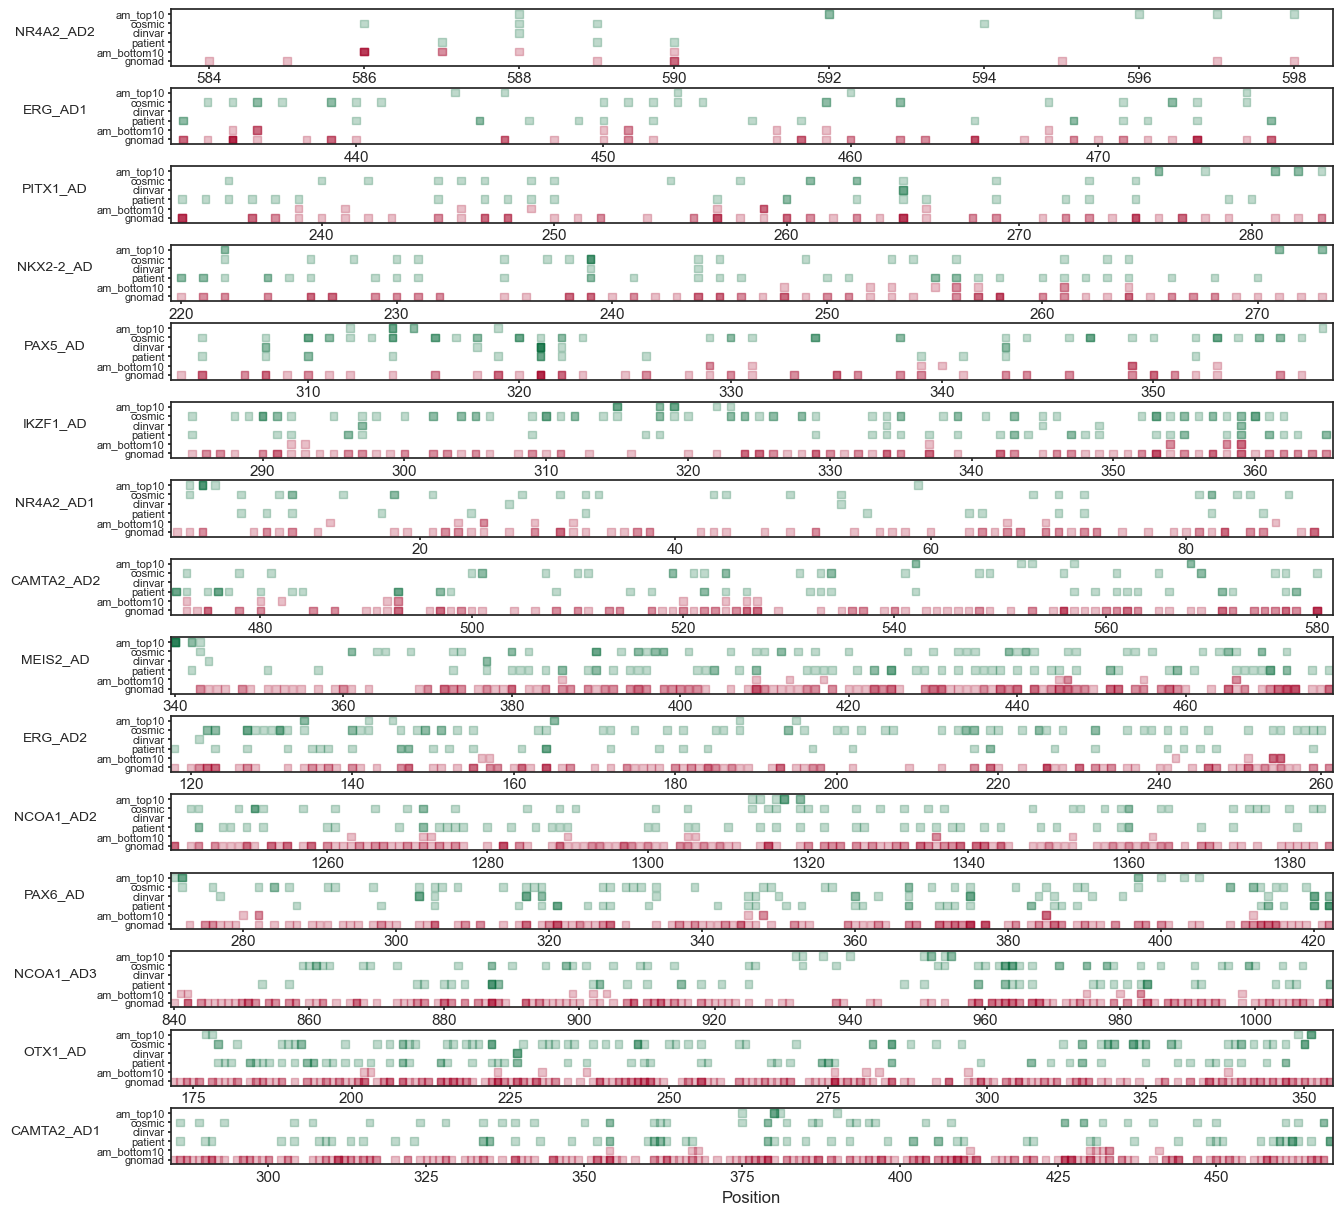

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sample mappings for demonstration
y_axis_mappings = {"gnomad": 1, "am_bottom10": 2, "patient": 3, "clinvar": 4, "cosmic": 5, "am_top10": 6}
color_mappings = {"gnomad": "g", "am_bottom10": "g", "patient": "red", "clinvar": "red", "cosmic": "red", "am_top10": "red"}

# Assuming concat_vars is defined and includes "Gene Name", "Mutation", and "Protein Change"
# concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
# concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
# concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

# Prepare the figure for 15 subplots
fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(15, 15))  # Adjusted size for better visibility
plt.subplots_adjust(hspace=0.4)  # Add space between the subplots

for i, AD in enumerate(cc_names["Gene Name"]):
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["start"].iloc[0]
    end = cc_row["end"].iloc[0]
    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]
    
    # Set the current axis for plotting
    ax = axes[i]
    
    # Scatter plot on the current axis
    ax.scatter(x=AD_concat_vars["pos"], 
               y=AD_concat_vars["y_val"], 
               c=AD_concat_vars["hue"].replace(color_mappings).astype('category').cat.codes, 
               cmap='RdYlGn',  # Choose a color map (adjust if necessary)
               alpha=0.25, 
               marker="$\u25A0$", 
               s=30)

    ax.set_xlim(start - 0.5, end + 0.5)
    ax.set_ylim(0.5, 6.5)


    ax.tick_params(axis='both', which='major', pad=2.3, length = 2)
    
    ax.set_yticks(range(1, 7))  # Set y-ticks to match y_val range
    ax.set_yticklabels(y_axis_mappings.keys(), fontsize=8)  # Smaller font size for y-tick labels
    ax.set_ylabel(AD, rotation=0, labelpad=30, fontsize=10)  # Gene name on the left
    
    # Optionally add a title for the subplot if needed
    # ax.set_title(AD, loc='left', fontsize=10)

# Set a common x-label for all subplots
plt.xlabel("Position", fontsize=12)

# Show the complete plot with all subplots
plt.show()


CAMTA2_AD1
OTX1_AD
NCOA1_AD3
PAX6_AD
NCOA1_AD2
ERG_AD2
MEIS2_AD
CAMTA2_AD2
NR4A2_AD1
IKZF1_AD
PAX5_AD
NKX2-2_AD
PITX1_AD
ERG_AD1
NR4A2_AD2


NameError: name 'legend_df' is not defined

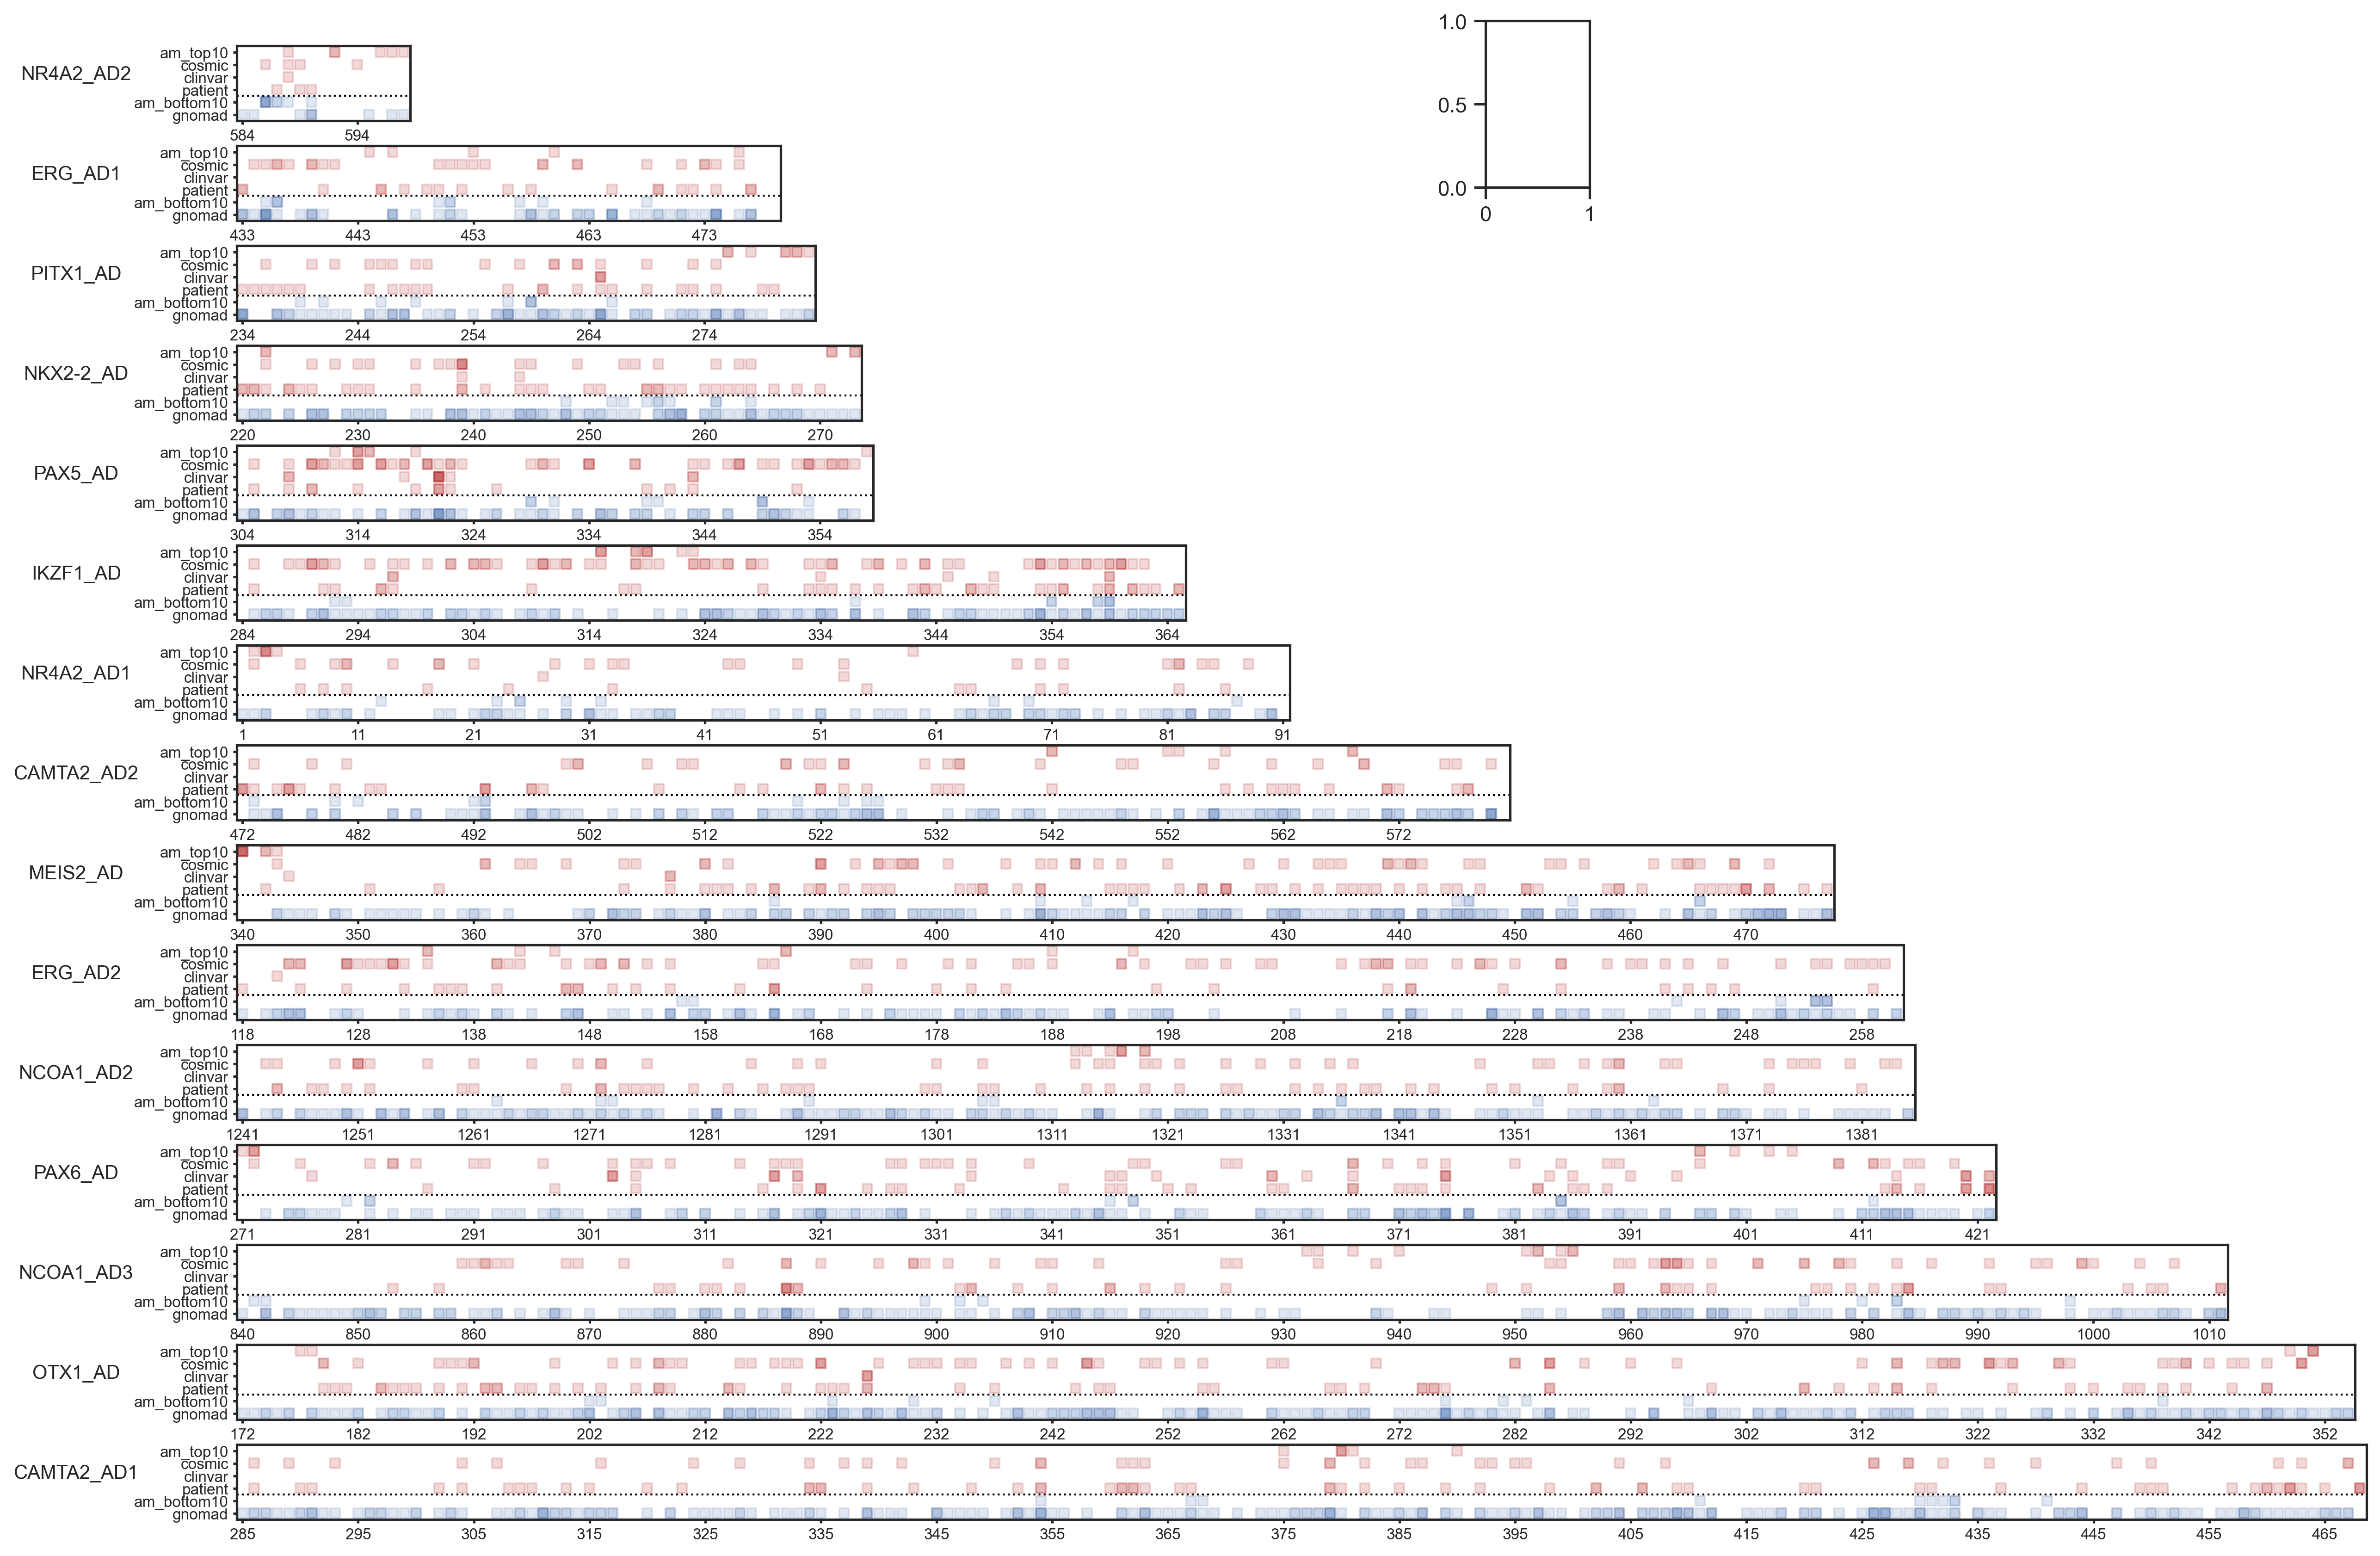

In [24]:

import matplotlib.gridspec as gridspec
import matplotlib.patches as patches


def plot_legend(c, position):
    ax_legend = fig.add_axes(position)  # Create new axis for legend
    sns.scatterplot(
            x=legend_df["x"],
            y=legend_df["y"],
            c= c,#AD_concat_vars["hue"],#.replace(color_mappings).astype('category').cat.codes,
            alpha=1/6,
            marker="$\u25A0$",
            s=50,
        )
    
    # Remove axis labels, ticks, and box
    plt.axis('off')  # Turn off axis lines and labels
    plt.gca().set_frame_on(False)  # Turn off the frame
    
    
    for i in range(1, 7):
        plt.text(1 - 0.04, 7 - i - 0.2, i, fontsize=12, color="black")
    




# Sample mappings for demonstration
y_axis_mappings = {
    "gnomad": 1,
    "am_bottom10": 2,
    "patient": 3,
    "clinvar": 4,
    "cosmic": 5,
    "am_top10": 6,
}
color_mappings = {
    "gnomad": "b",
    "am_bottom10": "b",
    "patient": "firebrick",
    "clinvar": "firebrick",
    "cosmic": "firebrick",
    "am_top10": "firebrick",
}

concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

# Prepare the figure and gridspec
fig = plt.figure(figsize=(15, 12), dpi = 300)  # Set figure size
gs = gridspec.GridSpec(len(cc_names), 1, hspace=2)  # Increased vertical space between plots
cc_names = cc_names.sort_values(by = "len", ascending = False)

for i, AD in enumerate(cc_names["Gene Name"]):
    print(AD)
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["start"].iloc[0]
    end = cc_row["end"].iloc[0]
    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]

    # Calculate the width of the subplot based on the number of positions
    num_positions = len(pivot)
    width_ratio = num_positions / (len(all_muts) / 15)  # Normalize the width
    width = max(0, min(1.5, width_ratio))  # Limit width between 0.25 and 1.5

    # Create a new axis for each gene
    ax = fig.add_subplot(gs[i, 0], aspect='auto')
    ax.set_position([0.1, 0.1 + (i * 0.06), width, 0.045])  # Adjust position with more vertical space
    
    # Scatter plot on the current axis with reversed color map
    scatter = ax.scatter(
        x=AD_concat_vars["pos"],
        y=AD_concat_vars["y_val"],
        c=AD_concat_vars["hue"],#.replace(color_mappings).astype('category').cat.codes,
        #cmap='RdYlGn_r',  # Use the reversed 'RdYlGn' color map
        alpha=1/6,
        marker="$\u25A0$",
        s=25,
    )

    ax.set_xlim(start - 0.5, end + 0.6)
    ax.set_ylim(0.5, 6.5)

    ax.axhline(y=2.5, linewidth=1, color='black', ls=':')


    # Set x-ticks every 10 units
    ax.set_xticks(np.arange(start, end + 1, 10))
    ax.set_xticklabels(np.arange(start, end + 1, 10), fontsize=8)  # Smaller font size for x-tick labels
    ax.tick_params(axis='both', which='major', pad=2.3, length = 2)

    ax.set_yticks(range(1, 7))  # Set y-ticks to match y_val range
    ax.set_yticklabels(y_axis_mappings.keys(), fontsize=8)  # Smaller font size for y-tick labels
    ax.set_ylabel(AD, rotation=0, labelpad=30, fontsize=10)  # Gene name on the left

# Set a common x-label for all subplots
#plt.xlabel("Position", fontsize=12)

# Plot the first legend (firebrick color) in the top right
plot_legend("firebrick", [0.7, 0.9, 0.05, 0.1])  # [left, bottom, width, height]

# Plot the second legend (blue color) in the top right, slightly below the first
plot_legend("b", [0.75, 0.9, 0.05, 0.1])

# Show the complete plot with all subplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [21]:
concat_vars = concat_vars[concat_vars["y_val"] != "am_bottom10"]
concat_vars = concat_vars[concat_vars["y_val"] != "am_top10"]

CAMTA2_AD1


TypeError: 'value' must be an instance of str or bytes, not a int

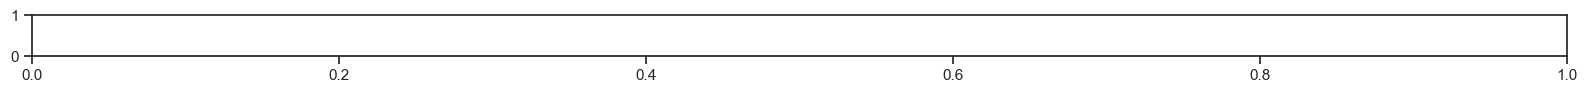

In [25]:
import matplotlib.patches as patches

def plot_legend(c, position, title):
    # Create new axis for legend
    ax_legend = fig.add_axes(position)  
    
    # Scatter plot for legend items
    sns.scatterplot(
            x=legend_df["x"],
            y=legend_df["y"],
            c= c,
            alpha=1/6,
            marker="$\u25A0$",
            s=50,
        )
    
    # Remove axis labels, ticks, and box
    plt.axis('off')  # Turn off axis lines and labels
    plt.gca().set_frame_on(False)  # Turn off the frame
    
    # Add text for numbers
    for i in range(1, 7):
        plt.text(1 - 0.04, 7 - i - 0.2, i, fontsize=12, color="black")

    # Add a bounding box around the legend
    rect = patches.Rectangle((0, 0), 1, 6, linewidth=1, edgecolor='black', facecolor='none')
    ax_legend.add_patch(rect)
    
    # Add title for the legend
    plt.text(0.5, 7, title, fontsize=10, color='black', ha='center')

# Sample mappings for demonstration
y_axis_mappings = {
    "gnomad": 1,
    "patient": 2,
    "clinvar": 3,
    "cosmic": 4,
}
color_mappings = {
    "gnomad": "b",
    "patient": "firebrick",
    "clinvar": "firebrick",
    "cosmic": "firebrick",
}

concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

# Prepare the figure and gridspec
fig = plt.figure(figsize=(15, 9))  # Set figure size
gs = gridspec.GridSpec(len(cc_names), 1, hspace=2.5)  # Increased vertical space between plots
cc_names = cc_names.sort_values(by = "len", ascending = False)

for i, AD in enumerate(cc_names["Gene Name"]):
    print(AD)
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["start"].iloc[0]
    end = cc_row["end"].iloc[0]
    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]

    # Calculate the width of the subplot based on the number of positions
    num_positions = len(pivot)
    width_ratio = num_positions / (len(all_muts) / 15)  # Normalize the width
    width = max(0, min(1.5, width_ratio))  # Limit width between 0.25 and 1.5

    # Create a new axis for each gene
    ax = fig.add_subplot(gs[i, 0], aspect='auto')
    ax.set_position([0.1, 0.1 + (i * 0.06), width, 0.045])  # Adjust position with more vertical space
    
    # Scatter plot on the current axis with reversed color map
    scatter = ax.scatter(
        x=AD_concat_vars["pos"],
        y=AD_concat_vars["y_val"],
        c=AD_concat_vars["hue"],
        alpha=1/6,
        marker="$\u25A0$",
        s=25,
    )

    ax.set_xlim(start - 0.5, end + 0.6)
    ax.set_ylim(0.5, 4.5)

    #ax.axhline(y=2.5, linewidth=1, color='black', ls=':')

    # Set x-ticks every 10 units
    ax.set_xticks(np.arange(start, end + 1, 10))
    ax.set_xticklabels(np.arange(start, end + 1, 10), fontsize=8)  # Smaller font size for x-tick labels
    ax.tick_params(axis='both', which='major', pad=2.3, length=2)

    ax.set_yticks(range(1, 5))  # Set y-ticks to match y_val range
    ax.set_yticklabels(y_axis_mappings.keys(), fontsize=8)  # Smaller font size for y-tick labels
    ax.set_ylabel(AD, rotation=0, labelpad=30, fontsize=10)  # Gene name on the left

# Plot the first legend (firebrick color) in the top right
#plot_legend("firebrick", [0.7, 0.9, 0.05, 0.1], "Number of Variants")

# Plot the second legend (blue color) in the top right, slightly below the first
#plot_legend("b", [0.75, 0.9, 0.05, 0.1], "Number of Variants")

# Show the complete plot with all subplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [26]:
all_muts[all_muts["Gene Name"] == AD]

,Gene Name,Mutant Sequence,Protein Change,am_bottom_10,am_top_10,clinvar,cosmic,pt_vars,gnomad,overlap_sum,pos
40,CAMTA2_AD1,KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Pro430Ala,1,0,0,0,0,1,2,430
41,CAMTA2_AD1,KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Val433Ala,1,0,0,0,0,1,2,433
42,CAMTA2_AD1,KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Ser432Ala,1,0,0,0,0,0,1,432
43,CAMTA2_AD1,KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Pro367Ala,1,0,0,0,0,0,1,367
44,CAMTA2_AD1,KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Cys441Arg,1,0,0,0,0,0,1,441
...,...,...,...,...,...,...,...,...,...,...,...
864,CAMTA2_AD1,KAHISPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Thr288Ile,0,0,0,0,0,1,1,288
865,CAMTA2_AD1,KAYTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.His287Tyr,0,0,0,0,0,1,1,287
866,CAMTA2_AD1,KANTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.His287Asn,0,0,0,0,0,1,1,287
867,CAMTA2_AD1,KGHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,p.Ala286Gly,0,0,0,0,0,1,1,286


In [27]:
pd.DataFrame(concat_vars.groupby(["Gene Name", "Mutation", "pos"]).size()).sort_values(0)

0
Gene Name  Mutation    pos   
CAMTA2_AD1 am_bottom10 354  1
NCOA1_AD3  patient     877  1
                       876  1
                       857  1
                       853  1
...                        ..
           gnomad      887  5
ERG_AD1    gnomad      435  6
MEIS2_AD   am_top10    340  6
PAX5_AD    gnomad      321  6
           clinvar     321  6

[2366 rows x 1 columns]

In [28]:
legend_df = pd.DataFrame({"x" : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              "y" : [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6]})
legend_df

,x,y
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,2
7,1,2
8,1,2
9,1,2


In [29]:
plot_legend("firebrick")
plt.show()

plot_legend("b")
plt.show()

TypeError: plot_legend() missing 2 required positional arguments: 'position' and 'title'

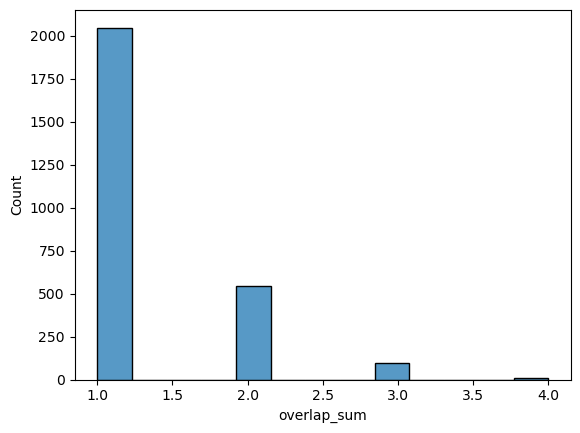

In [88]:
sns.histplot(all_muts["overlap_sum"]);

---
Sanity check, are they one away from expected?

In [904]:
concat_vars

,Gene Name,Mutant Sequence,Protein Change,Mutation,pos,y_val,hue
0,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro980Ala,am_bottom10,980,2,b
1,NCOA1_AD3,VPSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Thr841Pro,am_bottom10,841,2,b
2,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Pro975Ala,am_bottom10,975,2,b
3,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Ile899Met,am_bottom10,899,2,b
4,NCOA1_AD3,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,p.Ser904Pro,am_bottom10,904,2,b
...,...,...,...,...,...,...,...
1934,PAX5_AD,GRDSASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Leu307Ser,gnomad,307,1,b
1935,PAX5_AD,GPDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Pro,gnomad,305,1,b
1936,PAX5_AD,GHDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305His,gnomad,305,1,b
1937,PAX5_AD,GCDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,p.Arg305Cys,gnomad,305,1,b


In [906]:
data = {
    'AD': ['ERG_AD1', 'PITX1_AD', 'NKX2_2_AD', 'PAX5_AD', 'IKZF1_AD', 
                      'NR4A2_AD1', 'MEIS2_AD', 'NCOA1_AD2', 'PAX6_AD', 'CAMTA2_AD2'],
    'Reference Sequence': [
        'PHPPALPVTSSSFFAAPNPYWNSPTGGIYPNTRLPTSHMPSHLGTYY',
        'VPGMPNSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCNSSLA',
        'AQDLAAATFQAGIPFSAYSAQSLQHMQYNAQYSSASTPQYPTAHPLVQAQQWTW',
        'GRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHPQYSSYNDSW',
        'GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRPLVQTPPGGSEVVPVISPMYQLHKPLAEGTPRSNHSA',
        'PCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDLTNTEITATTSLPSFSTFMDNYSTGYDVKPPCLYQMPLSGQQSSIK',
        'DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQSMPGDYVSQGGPMGMSMAQPSYTPPQMTPHPTQLRHGPPMHSYLPSHPHHPAMMMHGGPPTHPGMTMSAQSPTMLNSVDPNVGGQVMDIHAQ',
        'GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQQGAIGNNNVFSQAVQNQPTPAQPGVYNNMSITVSMAGGNTNVQNMNPMMAQMQMSSLQMPGMNTVCPEQINDPALRHTGLYCNQLSSTDLLKTEADGTQ',
        'LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPTSPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPRLQ',
        'KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTGLEQRAGGLTPTRHLAPQADPRPSMSLAVVVGTEPSAPPAPPSPAFDPDRFLNSPQRGQTYGGGQGVSPDFPEAEAAHTPCSALEPAAALEPQAAARGPPPQSVAGGRRGNCFFIQDDDSGEELKGHGAAPPIPSPPPS'
    ]
}

expec_df = pd.DataFrame(data)
expec_df

,AD,Reference Sequence
0,ERG_AD1,PHPPALPVTSSSFFAAPNPYWNSPTGGIYPNTRLPTSHMPSHLGTYY
1,PITX1_AD,VPGMPNSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCN...
2,NKX2_2_AD,AQDLAAATFQAGIPFSAYSAQSLQHMQYNAQYSSASTPQYPTAHPL...
3,PAX5_AD,GRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...
4,IKZF1_AD,GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...
5,NR4A2_AD1,PCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDLT...
6,MEIS2_AD,DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...
7,NCOA1_AD2,GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...
8,PAX6_AD,LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...
9,CAMTA2_AD2,KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...


In [938]:
for AD in expec_df["AD"]:
    AD_vars = concat_vars[concat_vars["Gene Name"] == AD].copy(deep = True)
    expec_seq = expec_df[expec_df["AD"] == AD]["Reference Sequence"].iloc[0]
    AD_vars['lev_dist'] = AD_vars['Mutant Sequence'].apply(lambda x: lev.distance(x, expec_seq))
    if sum(AD_vars['lev_dist']) != len(AD_vars):
        print("ERROR check" + AD)
        print(expec_seq)
        display(AD_vars)
        print("----")
        print()

ERROR checkNR4A2_AD1
PCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDLTNTEITATTSLPSFSTFMDNYSTGYDVKPPCLYQMPLSGQQSSIK


,Gene Name,Mutant Sequence,Protein Change,Mutation,pos,y_val,hue,lev_dist
59,NR4A2_AD1,MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,p.Gln87Pro,am_bottom10,87,2,b,2
60,NR4A2_AD1,MPCVQAQYGSSPQGASPASQSYSYHSSGEYSCDFLTPEFVKFSMDL...,p.Ser32Cys,am_bottom10,32,2,b,2
61,NR4A2_AD1,MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,p.Thr69Ala,am_bottom10,69,2,b,2
62,NR4A2_AD1,MPCVQAQYGSSPQGASPASQSYGYHSSGEYSSDFLTPEFVKFSMDL...,p.Ser23Gly,am_bottom10,23,2,b,2
63,NR4A2_AD1,MPCVQAQYGSSPQGASPASQSYSYPSSGEYSSDFLTPEFVKFSMDL...,p.His25Pro,am_bottom10,25,2,b,2
...,...,...,...,...,...,...,...,...
1022,NR4A2_AD1,MPCVQAHYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,p.Gln7His,gnomad,7,1,b,2
1023,NR4A2_AD1,MPSVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,p.Cys3Ser,gnomad,3,1,b,2
1024,NR4A2_AD1,MPRVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,p.Cys3Arg,gnomad,3,1,b,2
1025,NR4A2_AD1,MSCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,p.Pro2Ser,gnomad,2,1,b,2


----

ERROR checkCAMTA2_AD2
KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTGLEQRAGGLTPTRHLAPQADPRPSMSLAVVVGTEPSAPPAPPSPAFDPDRFLNSPQRGQTYGGGQGVSPDFPEAEAAHTPCSALEPAAALEPQAAARGPPPQSVAGGRRGNCFFIQDDDSGEELKGHGAAPPIPSPPPS


,Gene Name,Mutant Sequence,Protein Change,Mutation,pos,y_val,hue,lev_dist
10,CAMTA2_AD2,SAAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Pro473Ala,am_bottom10,473,2,b,137
11,CAMTA2_AD2,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Gln527Pro,am_bottom10,527,2,b,136
12,CAMTA2_AD2,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Pro524Ala,am_bottom10,524,2,b,136
13,CAMTA2_AD2,SPAPLEPSSRVGRGEALFGGPAGASELEPFSLSSFPDLMGELISDE...,p.Val493Ala,am_bottom10,493,2,b,136
14,CAMTA2_AD2,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Ser520Gly,am_bottom10,520,2,b,136
...,...,...,...,...,...,...,...,...
306,CAMTA2_AD2,SPALLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Pro475Leu,gnomad,475,1,b,137
307,CAMTA2_AD2,SPAALEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Pro475Ala,gnomad,475,1,b,137
308,CAMTA2_AD2,SPASLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Pro475Ser,gnomad,475,1,b,137
309,CAMTA2_AD2,SPVPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,p.Ala474Val,gnomad,474,1,b,137


----



---
Adding Zoonomia to summary figure

In [1046]:
AD = "NR4A2_AD2"
concat_vars[concat_vars["Gene Name"] == AD]

,Gene Name,Mutant Sequence,Protein Change,Mutation,pos,y_val,hue
68,NR4A2_AD2,PPALIDKLFLDTLPF,p.Ile587Leu,am_bottom10,587,2,b
69,NR4A2_AD2,PPVIIDKLFLDTLPF,p.Ala586Val,am_bottom10,586,2,b
70,NR4A2_AD2,PPAIVDKLFLDTLPF,p.Ile588Val,am_bottom10,588,2,b
71,NR4A2_AD2,PPGIIDKLFLDTLPF,p.Ala586Gly,am_bottom10,586,2,b
72,NR4A2_AD2,PPPIIDKLFLDTLPF,p.Ala586Pro,am_bottom10,586,2,b
73,NR4A2_AD2,PPTIIDKLFLDTLPF,p.Ala586Thr,am_bottom10,586,2,b
74,NR4A2_AD2,PPAIIDRLFLDTLPF,p.Lys590Arg,am_bottom10,590,2,b
75,NR4A2_AD2,PPSIIDKLFLDTLPF,p.Ala586Ser,am_bottom10,586,2,b
76,NR4A2_AD2,PPAVIDKLFLDTLPF,p.Ile587Val,am_bottom10,587,2,b
50,NR4A2_AD2,PPAIIDKLFLDTLPL,p.Phe598Leu,am_top10,598,6,firebrick


In [1080]:
ENST = cc_names[cc_names["Gene Name"] == AD]["ENST"].iloc[0]
start = cc_names[cc_names["Gene Name"] == AD]["Start"].iloc[0]
end = cc_names[cc_names["Gene Name"] == AD]["End"].iloc[0]
ENST

'ENST00000339562'

In [1084]:
ENST_zoonomia = pd.read_csv("../soto_analysis/outputs/mutations/cds_zoonomia_15/" + ENST + ".bed", sep = "\t", header = None)
ENST_zoonomia["cds_nt"] = np.arange(len(ENST_zoonomia))
ENST_zoonomia["prot_pos"] = ENST_zoonomia["cds_nt"] //3
ENST_zoonomia

,0,1,2,3,4,5,6,7,8,9,cds_nt,prot_pos
0,2,156325743,156325744,P43354,ENST00000339562,-,2,156325743,156325744,4.313,0,0
1,2,156325744,156325745,P43354,ENST00000339562,-,2,156325744,156325745,6.360,1,0
2,2,156325745,156325746,P43354,ENST00000339562,-,2,156325745,156325746,6.335,2,0
3,2,156325746,156325747,P43354,ENST00000339562,-,2,156325746,156325747,5.852,3,1
4,2,156325747,156325748,P43354,ENST00000339562,-,2,156325747,156325748,6.335,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2,156330181,156330182,P43354,ENST00000339562,-,2,156330181,156330182,8.773,1792,597
1793,2,156330182,156330183,P43354,ENST00000339562,-,2,156330182,156330183,8.773,1793,597
1794,2,156330183,156330184,P43354,ENST00000339562,-,2,156330183,156330184,8.880,1794,598
1795,2,156330184,156330185,P43354,ENST00000339562,-,2,156330184,156330185,6.319,1795,598


In [1106]:
ENST_zoonomia_AD = ENST_zoonomia[(ENST_zoonomia["prot_pos"] <= end) & (start <= ENST_zoonomia["prot_pos"])]
ENST_zoonomia_AD = ENST_zoonomia_AD.rename(columns = {0: "chr", 1: "start", 2:"end"})
ENST_zoonomia_AD

,chr,start,end,3,4,5,6,7,8,9,cds_nt,prot_pos
1752,2,156330141,156330142,P43354,ENST00000339562,-,2,156330141,156330142,5.800,1752,584
1753,2,156330142,156330143,P43354,ENST00000339562,-,2,156330142,156330143,8.773,1753,584
1754,2,156330143,156330144,P43354,ENST00000339562,-,2,156330143,156330144,8.880,1754,584
1755,2,156330144,156330145,P43354,ENST00000339562,-,2,156330144,156330145,6.344,1755,585
1756,2,156330145,156330146,P43354,ENST00000339562,-,2,156330145,156330146,8.880,1756,585
1757,2,156330146,156330147,P43354,ENST00000339562,-,2,156330146,156330147,8.880,1757,585
1758,2,156330147,156330148,P43354,ENST00000339562,-,2,156330147,156330148,6.344,1758,586
1759,2,156330148,156330149,P43354,ENST00000339562,-,2,156330148,156330149,6.344,1759,586
1760,2,156330149,156330150,P43354,ENST00000339562,-,2,156330149,156330150,8.773,1760,586
1761,2,156330150,156330151,P43354,ENST00000339562,-,2,156330150,156330151,6.319,1761,587


In [1179]:
conserved_positions = pd.read_csv("../output/zoonomia_phyloP_cc_cds_sig_bonferroni.csv", index_col = 0)
conserved_positions

,chr,start,end,PhyloP,P,q
0,11,31806401,31806402,6.331,4.666594e-07,9.588331e-07
1,11,31806402,31806403,8.755,1.757924e-09,7.853911e-09
2,11,31806403,31806404,6.331,4.666594e-07,9.588331e-07
3,11,31806404,31806405,6.331,4.666594e-07,9.588331e-07
4,11,31806405,31806406,5.917,1.210598e-06,2.082426e-06
...,...,...,...,...,...,...
19437,15,36892453,36892454,8.763,1.725838e-09,7.853911e-09
19438,15,36892454,36892455,7.067,8.570378e-08,2.877960e-07
19439,15,36892455,36892456,6.311,4.886524e-07,9.588331e-07
19441,15,36892457,36892458,6.253,5.584702e-07,1.008389e-06


In [1181]:
AD_conserved_pos = pd.merge(ENST_zoonomia_AD, conserved_positions, on = ["chr", "start", "end"])
AD_conserved_pos

,chr,start,end,3,4,5,6,7,8,9,cds_nt,prot_pos,PhyloP,P,q
0,2,156330141,156330142,P43354,ENST00000339562,-,2,156330141,156330142,5.800,1752,584,5.800,1.584893e-06,2.639633e-06
1,2,156330142,156330143,P43354,ENST00000339562,-,2,156330142,156330143,8.773,1753,584,8.773,1.686553e-09,7.853911e-09
2,2,156330143,156330144,P43354,ENST00000339562,-,2,156330143,156330144,8.880,1754,584,8.880,1.318257e-09,7.853911e-09
3,2,156330144,156330145,P43354,ENST00000339562,-,2,156330144,156330145,6.344,1755,585,6.344,4.528976e-07,9.588331e-07
4,2,156330145,156330146,P43354,ENST00000339562,-,2,156330145,156330146,8.880,1756,585,8.880,1.318257e-09,7.853911e-09
5,2,156330146,156330147,P43354,ENST00000339562,-,2,156330146,156330147,8.880,1757,585,8.880,1.318257e-09,7.853911e-09
6,2,156330147,156330148,P43354,ENST00000339562,-,2,156330147,156330148,6.344,1758,586,6.344,4.528976e-07,9.588331e-07
7,2,156330148,156330149,P43354,ENST00000339562,-,2,156330148,156330149,6.344,1759,586,6.344,4.528976e-07,9.588331e-07
8,2,156330149,156330150,P43354,ENST00000339562,-,2,156330149,156330150,8.773,1760,586,8.773,1.686553e-09,7.853911e-09
9,2,156330150,156330151,P43354,ENST00000339562,-,2,156330150,156330151,6.319,1761,587,6.319,4.797334e-07,9.588331e-07


In [1183]:
#https://www.geeksforgeeks.org/python-make-a-list-of-intervals-with-sequential-numbers/
def intervals_extract(iterable):
     
    iterable = sorted(set(iterable))
    for key, group in itertools.groupby(enumerate(iterable),
    lambda t: t[1] - t[0]):
        group = list(group)
        yield [group[0][1], group[-1][1]]

584.0
598.6666666666666


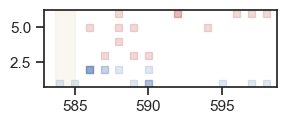

In [1240]:
plt.figure(figsize = (3,1))

plt.scatter(
        x=AD_concat_vars["pos"],
        y=AD_concat_vars["y_val"],
        c=AD_concat_vars["hue"],
        alpha=1/6,
        marker="$\u25A0$",
        s=25,
    )

intervals = list(intervals_extract(AD_conserved_pos["cds_nt"]))
    
for interval in intervals:
    print(interval[0]/3)
    print(interval[1]/3)
    plt.axvspan(584 + 0/3 - 1/3, 584 + 3/3, color="y", alpha=0.1)

CAMTA2_AD1
OTX1_AD
NCOA1_AD3
PAX6_AD
NCOA1_AD2
ERG_AD2
MEIS2_AD
CAMTA2_AD2
NR4A2_AD1
IKZF1_AD
PAX5_AD
NKX2-2_AD
PITX1_AD
ERG_AD1
NR4A2_AD2


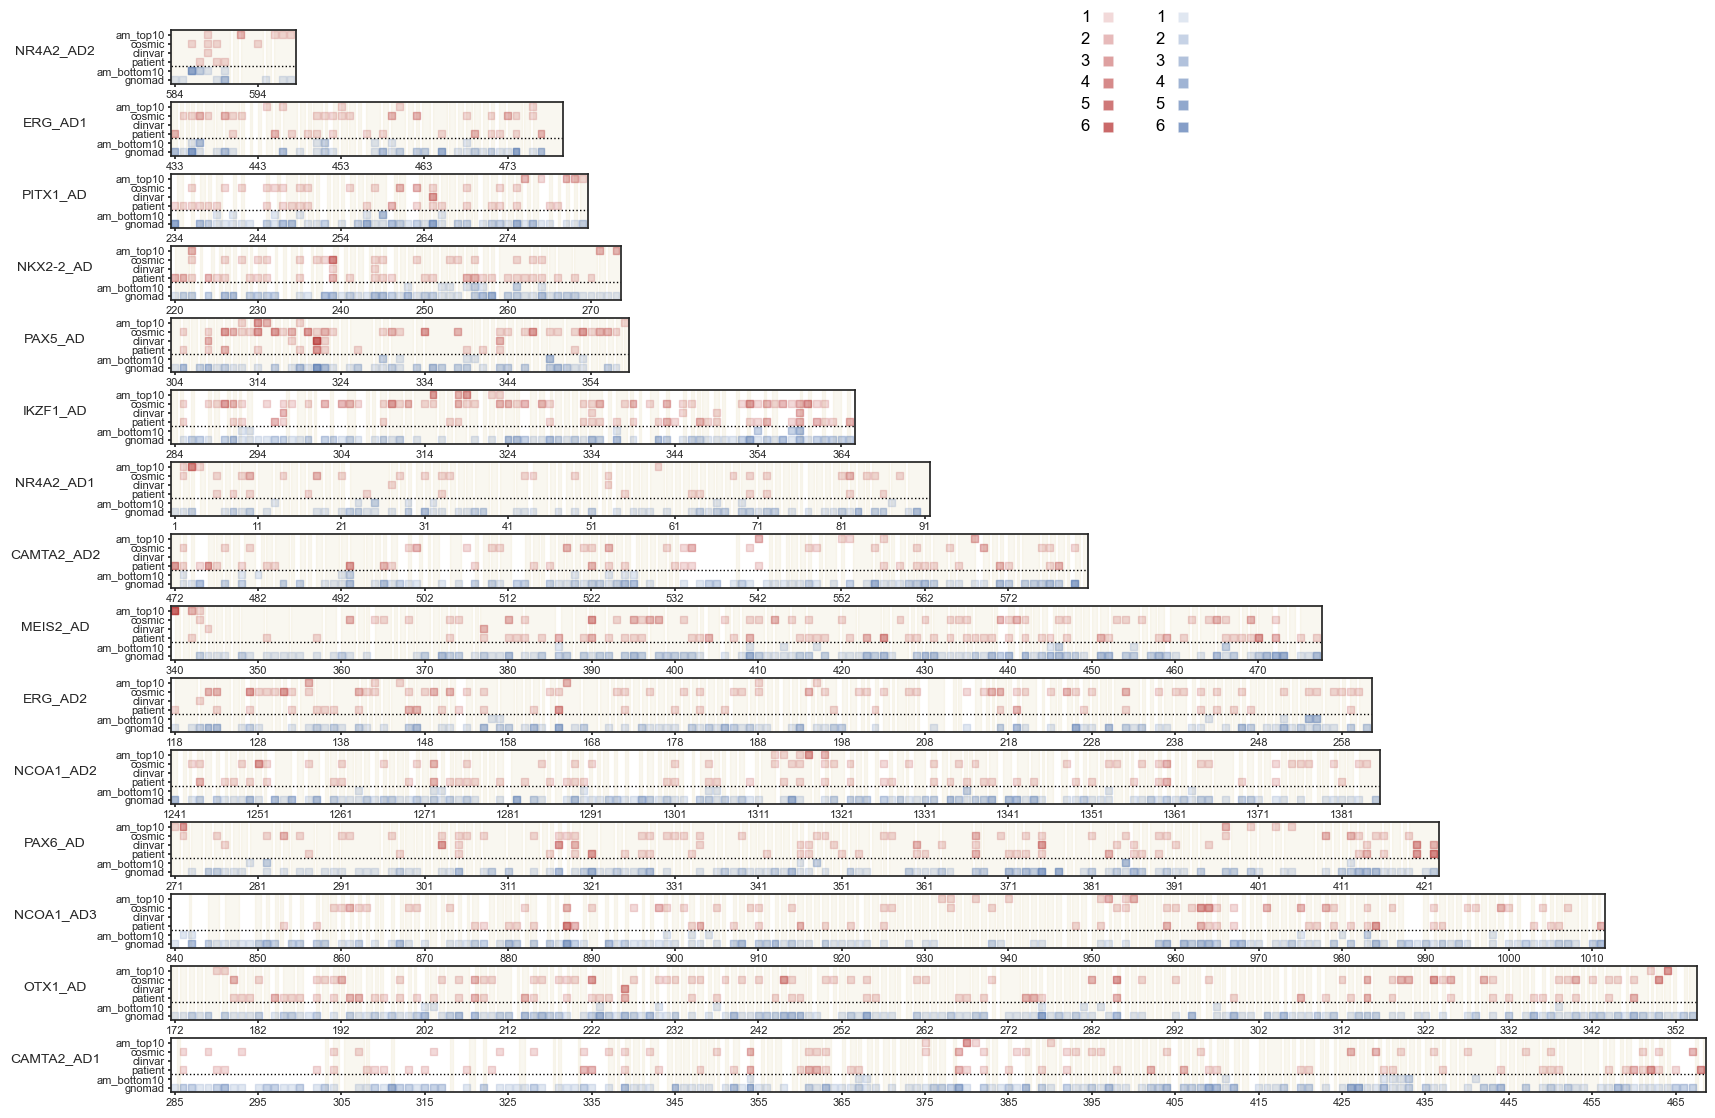

In [1253]:
import matplotlib.patches as patches
conserved_positions = pd.read_csv("../output/zoonomia_phyloP_cc_cds_sig_bonferroni.csv", index_col = 0)
conserved_positions

def plot_legend(c, position, title):
    # Create new axis for legend
    ax_legend = fig.add_axes(position)  
    
    # Scatter plot for legend items
    sns.scatterplot(
            x=legend_df["x"],
            y=legend_df["y"],
            c= c,
            alpha=1/6,
            marker="$\u25A0$",
            s=50,
        )
    
    # Remove axis labels, ticks, and box
    plt.axis('off')  # Turn off axis lines and labels
    plt.gca().set_frame_on(False)  # Turn off the frame
    
    # Add text for numbers
    for i in range(1, 7):
        plt.text(1 - 0.04, 7 - i - 0.2, i, fontsize=12, color="black")

    # Add a bounding box around the legend
    #rect = patches.Rectangle((0, 0), 1, 6, linewidth=1, edgecolor='black', facecolor='none')
    #ax_legend.add_patch(rect)
    
    # Add title for the legend
    #plt.text(0.5, 7, title, fontsize=10, color='black', ha='center')

y_axis_mappings = {
    "gnomad": 1,
    "am_bottom10": 2,
    "patient": 3,
    "clinvar": 4,
    "cosmic": 5,
    "am_top10": 6,
}
color_mappings = {
    "gnomad": "b",
    "am_bottom10": "b",
    "patient": "firebrick",
    "clinvar": "firebrick",
    "cosmic": "firebrick",
    "am_top10": "firebrick",
}

concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

# Prepare the figure and gridspec
fig = plt.figure(figsize=(15, 12))  # Set figure size
gs = gridspec.GridSpec(len(cc_names), 1, hspace=2)  # Increased vertical space between plots
cc_names = cc_names.sort_values(by = "len", ascending = False)

for i, AD in enumerate(cc_names["Gene Name"]):
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["Start"].iloc[0]
    end = cc_row["End"].iloc[0]
    ENST = cc_row["ENST"].iloc[0]
    

    ENST_zoonomia = pd.read_csv("../soto_analysis/outputs/mutations/cds_zoonomia_15/" + ENST + ".bed", sep = "\t", header = None)
    ENST_zoonomia["cds_nt"] = np.arange(len(ENST_zoonomia))
    ENST_zoonomia["prot_pos"] = ENST_zoonomia["cds_nt"] //3
    ENST_zoonomia_AD = ENST_zoonomia[(ENST_zoonomia["prot_pos"] <= end) & (start <= ENST_zoonomia["prot_pos"])]
    ENST_zoonomia_AD = ENST_zoonomia_AD.rename(columns = {0: "chr", 1: "start", 2:"end"})
    AD_conserved_pos = pd.merge(ENST_zoonomia_AD, conserved_positions, on = ["chr", "start", "end"])

    print(AD)
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    

    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]

    # Calculate the width of the subplot based on the number of positions
    num_positions = len(pivot)
    width_ratio = num_positions / (len(all_muts) / 15)  # Normalize the width
    width = max(0, min(1.5, width_ratio))  # Limit width between 0.25 and 1.5

    # Create a new axis for each gene
    ax = fig.add_subplot(gs[i, 0], aspect='auto')
    ax.set_position([0.1, 0.1 + (i * 0.06), width, 0.045])  # Adjust position with more vertical space
    
    # Scatter plot on the current axis with reversed color map
    intervals = list(intervals_extract(AD_conserved_pos["cds_nt"]))
    
    for interval in intervals:
        interv_start = interval[0]/3 - 1/3
        interv_end = interval[1]/3
        
        ax.axvspan(interv_start, interv_end, color="y", alpha=0.1)
        
    scatter = ax.scatter(
        x=AD_concat_vars["pos"],
        y=AD_concat_vars["y_val"],
        c=AD_concat_vars["hue"],
        alpha=1/6,
        marker="$\u25A0$",
        s=25,
    )

    ax.set_xlim(start - 0.5, end + 0.6)
    ax.set_ylim(0.5, 6.5)

    ax.axhline(y=2.5, linewidth=1, color='black', ls=':')

    # Set x-ticks every 10 units
    ax.set_xticks(np.arange(start, end + 1, 10))
    ax.set_xticklabels(np.arange(start, end + 1, 10), fontsize=8)  # Smaller font size for x-tick labels
    ax.tick_params(axis='both', which='major', pad=2.3, length=2)

    ax.set_yticks(range(1, 7))  # Set y-ticks to match y_val range
    ax.set_yticklabels(y_axis_mappings.keys(), fontsize=8)  # Smaller font size for y-tick labels
    ax.set_ylabel(AD, rotation=0, labelpad=30, fontsize=10)  # Gene name on the left

# Plot the first legend (firebrick color) in the top right
plot_legend("firebrick", [0.7, 0.9, 0.05, 0.1], "Number of Variants")

# Plot the second legend (blue color) in the top right, slightly below the first
plot_legend("b", [0.75, 0.9, 0.05, 0.1], "Number of Variants")

# Show the complete plot with all subplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#Bonferroni correction

CAMTA2_AD1
OTX1_AD
NCOA1_AD3
PAX6_AD
NCOA1_AD2
ERG_AD2
MEIS2_AD
CAMTA2_AD2
NR4A2_AD1
IKZF1_AD
PAX5_AD
NKX2-2_AD
PITX1_AD
ERG_AD1
NR4A2_AD2


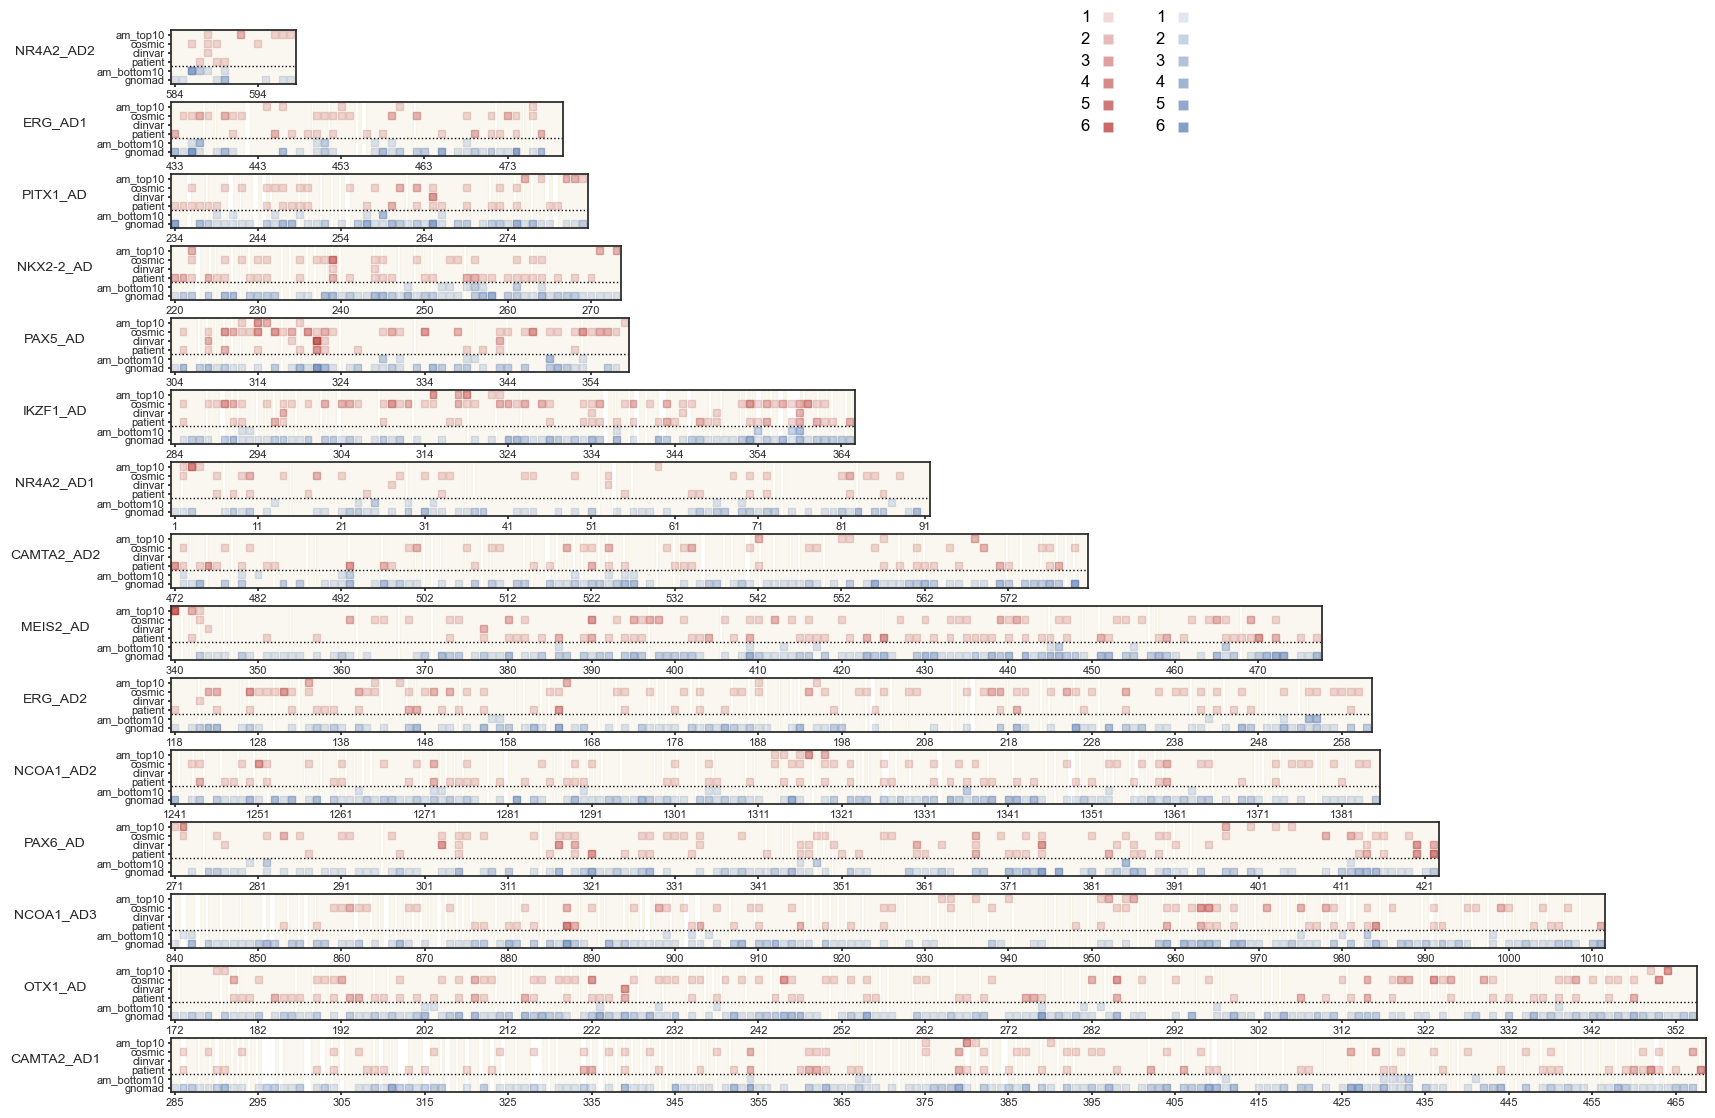

In [1244]:
conserved_positions = pd.read_csv("../output/zoonomia_phyloP_cc_cds_sig_bh.csv", index_col = 0)
import matplotlib.patches as patches

def plot_legend(c, position, title):
    # Create new axis for legend
    ax_legend = fig.add_axes(position)  
    
    # Scatter plot for legend items
    sns.scatterplot(
            x=legend_df["x"],
            y=legend_df["y"],
            c= c,
            alpha=1/6,
            marker="$\u25A0$",
            s=50,
        )
    
    # Remove axis labels, ticks, and box
    plt.axis('off')  # Turn off axis lines and labels
    plt.gca().set_frame_on(False)  # Turn off the frame
    
    # Add text for numbers
    for i in range(1, 7):
        plt.text(1 - 0.04, 7 - i - 0.2, i, fontsize=12, color="black")

    # Add a bounding box around the legend
    #rect = patches.Rectangle((0, 0), 1, 6, linewidth=1, edgecolor='black', facecolor='none')
    #ax_legend.add_patch(rect)
    
    # Add title for the legend
    #plt.text(0.5, 7, title, fontsize=10, color='black', ha='center')

y_axis_mappings = {
    "gnomad": 1,
    "am_bottom10": 2,
    "patient": 3,
    "clinvar": 4,
    "cosmic": 5,
    "am_top10": 6,
}
color_mappings = {
    "gnomad": "b",
    "am_bottom10": "b",
    "patient": "firebrick",
    "clinvar": "firebrick",
    "cosmic": "firebrick",
    "am_top10": "firebrick",
}

concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

# Prepare the figure and gridspec
fig = plt.figure(figsize=(15, 12))  # Set figure size
gs = gridspec.GridSpec(len(cc_names), 1, hspace=2)  # Increased vertical space between plots
cc_names = cc_names.sort_values(by = "len", ascending = False)

for i, AD in enumerate(cc_names["Gene Name"]):
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["Start"].iloc[0]
    end = cc_row["End"].iloc[0]
    ENST = cc_row["ENST"].iloc[0]
    

    ENST_zoonomia = pd.read_csv("../soto_analysis/outputs/mutations/cds_zoonomia_15/" + ENST + ".bed", sep = "\t", header = None)
    ENST_zoonomia["cds_nt"] = np.arange(len(ENST_zoonomia))
    ENST_zoonomia["prot_pos"] = ENST_zoonomia["cds_nt"] //3
    ENST_zoonomia_AD = ENST_zoonomia[(ENST_zoonomia["prot_pos"] <= end) & (start <= ENST_zoonomia["prot_pos"])]
    ENST_zoonomia_AD = ENST_zoonomia_AD.rename(columns = {0: "chr", 1: "start", 2:"end"})
    AD_conserved_pos = pd.merge(ENST_zoonomia_AD, conserved_positions, on = ["chr", "start", "end"])

    print(AD)
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    

    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]

    # Calculate the width of the subplot based on the number of positions
    num_positions = len(pivot)
    width_ratio = num_positions / (len(all_muts) / 15)  # Normalize the width
    width = max(0, min(1.5, width_ratio))  # Limit width between 0.25 and 1.5

    # Create a new axis for each gene
    ax = fig.add_subplot(gs[i, 0], aspect='auto')
    ax.set_position([0.1, 0.1 + (i * 0.06), width, 0.045])  # Adjust position with more vertical space
    
    # Scatter plot on the current axis with reversed color map
    intervals = list(intervals_extract(AD_conserved_pos["cds_nt"]))
    
    for interval in intervals:
        interv_start = interval[0]/3 - 1/3
        interv_end = interval[1]/3
        
        ax.axvspan(interv_start, interv_end, color="y", alpha=0.1)
        
    scatter = ax.scatter(
        x=AD_concat_vars["pos"],
        y=AD_concat_vars["y_val"],
        c=AD_concat_vars["hue"],
        alpha=1/6,
        marker="$\u25A0$",
        s=25,
    )

    ax.set_xlim(start - 0.5, end + 0.6)
    ax.set_ylim(0.5, 6.5)

    ax.axhline(y=2.5, linewidth=1, color='black', ls=':')

    # Set x-ticks every 10 units
    ax.set_xticks(np.arange(start, end + 1, 10))
    ax.set_xticklabels(np.arange(start, end + 1, 10), fontsize=8)  # Smaller font size for x-tick labels
    ax.tick_params(axis='both', which='major', pad=2.3, length=2)

    ax.set_yticks(range(1, 7))  # Set y-ticks to match y_val range
    ax.set_yticklabels(y_axis_mappings.keys(), fontsize=8)  # Smaller font size for y-tick labels
    ax.set_ylabel(AD, rotation=0, labelpad=30, fontsize=10)  # Gene name on the left

# Plot the first legend (firebrick color) in the top right
plot_legend("firebrick", [0.7, 0.9, 0.05, 0.1], "Number of Variants")

# Plot the second legend (blue color) in the top right, slightly below the first
plot_legend("b", [0.75, 0.9, 0.05, 0.1], "Number of Variants")

# Show the complete plot with all subplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#BH correction

CAMTA2_AD1
OTX1_AD
NCOA1_AD3
PAX6_AD
NCOA1_AD2
ERG_AD2
MEIS2_AD
CAMTA2_AD2
NR4A2_AD1
IKZF1_AD
PAX5_AD
NKX2-2_AD
PITX1_AD
ERG_AD1
NR4A2_AD2


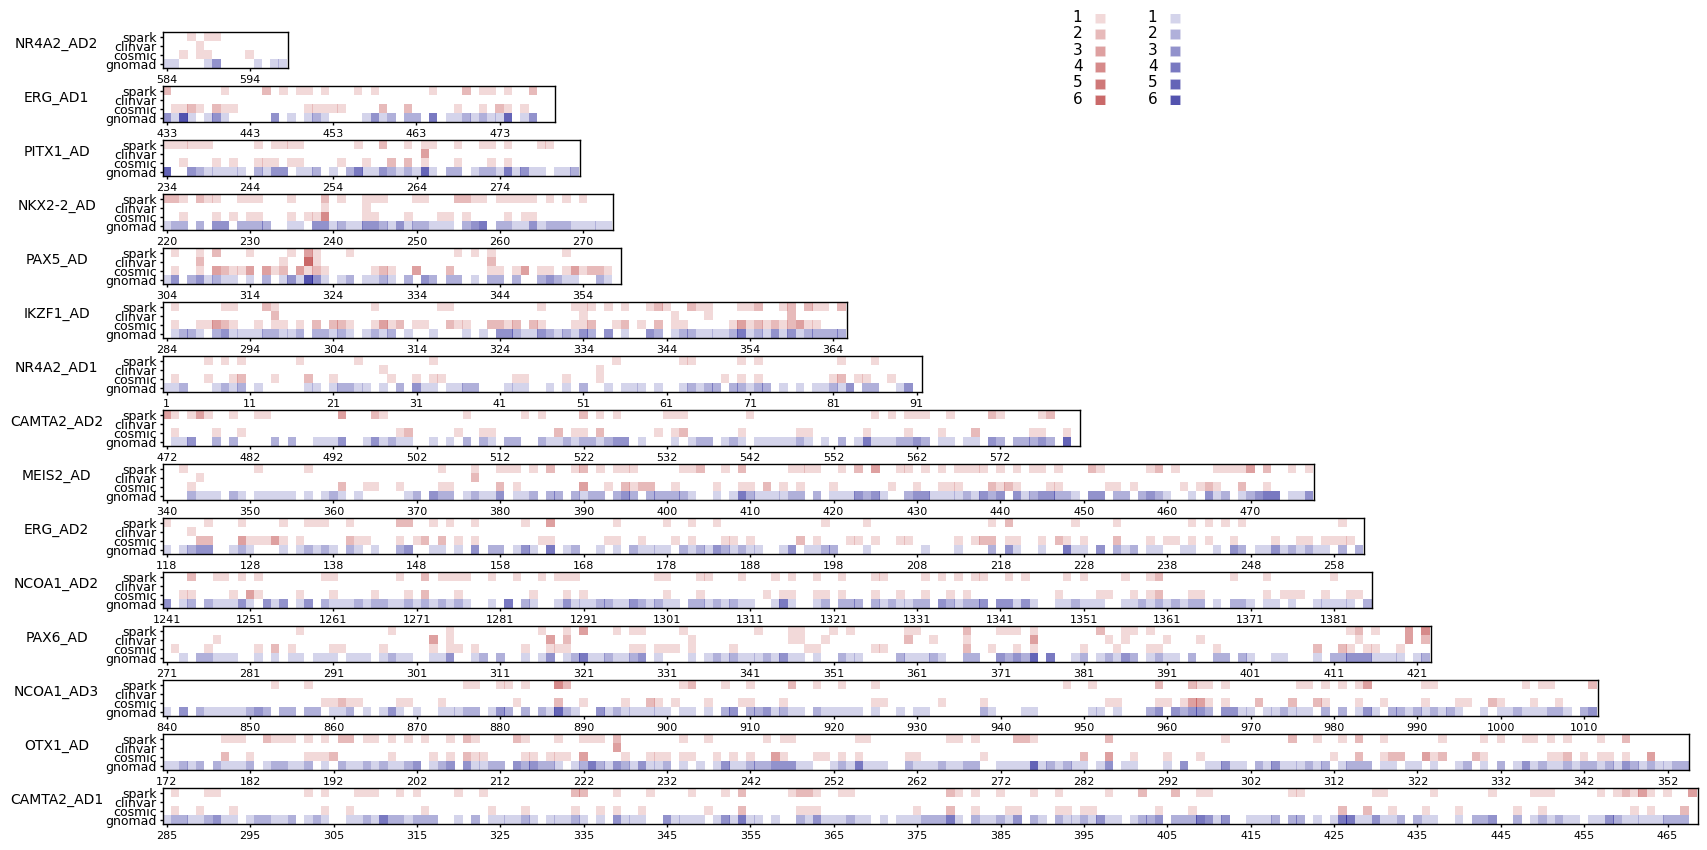

In [133]:

def plot_legend(c, position, title):
    # Create new axis for legend
    ax_legend = fig.add_axes(position)  
    
    # Scatter plot for legend items
    sns.scatterplot(
            x=legend_df["x"],
            y=legend_df["y"],
            c= c,
            alpha=1/6,
            marker="$\u25A0$",
            s=50,
        )
    
    # Remove axis labels, ticks, and box
    plt.axis('off')  # Turn off axis lines and labels
    plt.gca().set_frame_on(False)  # Turn off the frame
    
    # Add text for numbers
    for i in range(1, 7):
        plt.text(1 - 0.04, 7 - i - 0.2, i, fontsize=11, color="black")

    # Add a bounding box around the legend
    #rect = patches.Rectangle((0, 0), 1, 6, linewidth=1, edgecolor='black', facecolor='none')
    #ax_legend.add_patch(rect)
    
    # Add title for the legend
    #plt.text(0.5, 7, title, fontsize=10, color='black', ha='center')


#conserved_positions = pd.read_csv("../output/zoonomia_phyloP_cc_cds_sig_bh.csv", index_col = 0)
y_axis_mappings = {
    "gnomad": 1,
    #"am_bottom10": 2,
        "cosmic": 2,
        "clinvar": 3,
    "patient": 4,
    #"am_top10": 6,
}
color_mappings = {
    "gnomad": "darkblue",
    "am_bottom10": "b",
    "patient": "firebrick",
    "clinvar": "firebrick",
    "cosmic": "firebrick",
    "am_top10": "firebrick",
}

concat_vars["pos"] = concat_vars["Protein Change"].str.extract(r'(\d+)').astype(int)
concat_vars["y_val"] = concat_vars["Mutation"].replace(y_axis_mappings)
concat_vars["hue"] = concat_vars["Mutation"].replace(color_mappings)

# Prepare the figure and gridspec
fig = plt.figure(figsize=(15, 9))  # Set figure size
gs = gridspec.GridSpec(len(cc_names), 1, hspace=3, wspace = 10)  
cc_names = cc_names.sort_values(by = "len", ascending = False)

for i, AD in enumerate(cc_names["Gene Name"]):
    cc_row = cc_names[cc_names["Gene Name"] == AD]
    start = cc_row["Start"].iloc[0]
    end = cc_row["End"].iloc[0]
    ENST = cc_row["ENST"].iloc[0]

    print(AD)
    AD_muts = all_muts[all_muts["Gene Name"] == AD]
    AD_muts = AD_muts.sort_values(by="pos")
    

    empty_added = pd.DataFrame({"pos": np.arange(start, end + 1)})
    
    pivot = AD_muts[["pos", "am_bottom_10", "am_top_10", "clinvar", "cosmic", "pt_vars", "gnomad"]]
    pivot = pd.merge(empty_added, pivot, how="left").fillna(0)
    pivot = pivot.groupby("pos").sum()
    AD_concat_vars = concat_vars[concat_vars["Gene Name"] == AD]

    # Calculate the width of the subplot based on the number of positions
    num_positions = len(pivot)
    width_ratio = num_positions / (len(all_muts) / 15)  # Normalize the width
    width = max(0, min(1.5, width_ratio))

    # Create a new axis for each gene
    ax = fig.add_subplot(gs[i, 0], aspect='auto')
    ax.set_position([0.1, 0.1 + (i * 0.06), width, 0.04])  # Adjust position with more vertical space
    

    scatter = ax.scatter(
        x=AD_concat_vars["pos"],
        y=AD_concat_vars["y_val"],
        c=AD_concat_vars["hue"],
        alpha=1/6,
        marker="$\u25A0$",
        s=38, edgecolor = 'none', linewidth = 0
    )

    ax.set_xlim(start - 0.5, end + 0.6)
    ax.set_ylim(0.5, 4.5)

    #ax.axhline(y=2.5, linewidth=1, color='black', ls=':')

    # Set x-ticks every 10 units
    ax.set_xticks(np.arange(start, end + 1, 10))
    ax.set_xticklabels(np.arange(start, end + 1, 10), fontsize=8)  # Smaller font size for x-tick labels
    ax.tick_params(axis='both', which='major', pad=2.3, length=2)

    ax.set_yticks(range(1, 5))  # Set y-ticks to match y_val range
    ax.set_yticklabels(["gnomad", "cosmic", "clinvar", "spark"], fontsize=9)  # Smaller font size for y-tick labels  #CHECK!
    ax.set_ylabel(AD, rotation=0, labelpad=35, fontsize=10)  # Gene name on the left 
    
# Plot the first legend (firebrick color) in the top right
plot_legend("firebrick", [0.7, 0.9, 0.05, 0.1], "Number of Variants")

# Plot the second legend (blue color) in the top right, slightly below the first
plot_legend("darkblue", [0.75, 0.9, 0.05, 0.1], "Number of Variants")

# Show the complete plot with all subplots
#plt.subplots_adjust(hspace=2)
fig.tight_layout()  # Adjust layout to prevent overlap
fig.show()

#BH correction

In [107]:
legend_df = pd.DataFrame({"x" : np.ones(21),
                         "y" : 1 + np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5])})
legend_df

,x,y
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
5,1.0,1
6,1.0,2
7,1.0,2
8,1.0,2
9,1.0,2


<Axes: xlabel='x', ylabel='y'>

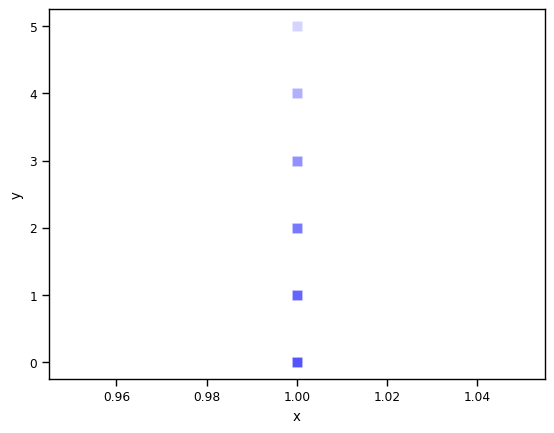

In [103]:
sns.scatterplot(
            x=legend_df["x"],
            y=legend_df["y"],
            c= "b",
            alpha=1/6,
            marker="$\u25A0$",
            s=50,
        )